Making separate folders for the categories created in the CSV file. Matching the ID in the CSV with the image, making a new folder for a class and putting the image there, and also selecting them into training and testing sets.

In [1]:
#Importing necessary libraries

import random as rn
import os
import numpy as np
import pandas as pd
import shutil
from shutil import copyfile
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Defining the path to the data directories
#One path will be for the csv which contains information about the classification and the other is folder with the images

df = pd.read_csv('Galaxy_ErEcSct.csv')
pic_all = "C:/python_lessons/January_Project/images/"

In [4]:
# Firstly, making 2 directories for sorted images and split images. If it is already there, then does nothing
try:
    os.makedirs("sorted_images")
except FileExistsError:
   # directory already exists
   pass

try:
    os.makedirs("split_images")
except FileExistsError:
   # directory already exists
   pass

In [5]:
# Deleting if necessary
folder = 'sorted_images'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [6]:
# Deleting if necesssary
folder = 'split_images'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [7]:
# Making directories for each class in the sorted images directory
# have to be the same names as the ones in the dataframe
try:
    os.makedirs("sorted_images\Round_elliptical")
except FileExistsError:
   # directory already exists
   pass

try:
    os.makedirs("sorted_images\Cigar_elliptical")
except FileExistsError:
   # directory already exists
   pass

try:
    os.makedirs("sorted_images\Tight_spiral")
except FileExistsError:
   # directory already exists
   pass


In [15]:
# Naming the source directory and the classes' directory paths
src_directory = pic_all
se_directory = "sorted_images/Cigar_elliptical/"
e_directory = "sorted_images/Round_elliptical/"
sa_directory = "sorted_images/Tight_spiral/"

In [9]:
df.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,original,5,Er,Round_elliptical,1
1,5.880000e+17,original,13,Ec,Cigar_elliptical,0
2,5.880000e+17,original,16,Er,Round_elliptical,1
3,5.880000e+17,original,17,Er,Round_elliptical,1
4,5.880000e+17,original,22,Er,Round_elliptical,1


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


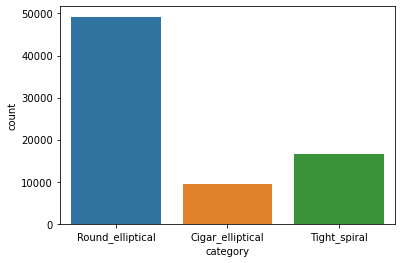

In [10]:
sns.countplot(df['category']);

In [10]:
!pip install split-folders

for i in range(len(df_processed.index)):
    df_processed['path'][i] = "images"+"\\"+str(df_processed['asset_id'][i])+".csv"

df_processed['path']

df_processed[[os.path.isfile(i.split('\\').str[-1]) for i in df_processed['path']]]

In [11]:
df['category'].value_counts(), df['category_encoded'].value_counts()

(Round_elliptical    49196
 Tight_spiral        16607
 Cigar_elliptical     9479
 Name: category, dtype: int64,
 1    49196
 2    16607
 0     9479
 Name: category_encoded, dtype: int64)

In [16]:
# Copying the images over into the specific folders based on their ID and the ID in the CSV
for i in range(len(df.index)):
    try:
        fileName = df['asset_id'][i]
        print(fileName)
        src_file = src_directory + "\\" + str(fileName) + ".jpg"
        print(df['category_encoded'][i])
        
        if df['category_encoded'][i] == 0:
            dest_file = se_directory + "\\" + str(fileName) + ".jpg"
        elif df['category_encoded'][i] == 1:
            dest_file = e_directory + "\\" + str(fileName) + ".jpg"
        else:
            dest_file = sa_directory + "\\" + str(fileName) + ".jpg"
        copyfile(src_file, dest_file)
    except:
        pass

5
1
13
0
16
1
17
1
22
1
32
1
33
1
44
2
45
2
46
2
47
1
52
2
53
2
54
2
55
0
56
0
57
0
60
2
65
1
66
1
67
1
73
1
77
2
82
1
98
1
99
1
100
1
105
1
110
1
111
1
112
1
113
1
117
1
118
1
119
1
125
0
126
0
127
1
133
2
134
2
135
2
136
2
137
2
138
2
139
2
143
1
148
1
149
1
154
1
157
2
158
2
162
2
164
2
172
1
175
1
176
1
184
1
185
1
186
0
187
0
189
1
193
0
195
1
196
0
197
0
198
0
209
1
216
2
217
2
218
2
219
2
228
2
229
2
236
0
237
1
245
1
247
0
249
0
251
1
255
1
256
1
259
1
268
1
269
1
309
2
310
1
311
1
312
1
313
1
314
1
315
1
316
1
317
1
333
2
339
1
340
1
349
1
350
1
351
2
352
1
354
1
368
1
370
1
383
1
384
1
385
1
386
1
393
2
394
2
395
2
396
2
400
0
401
0
402
1
416
1
417
1
418
1
419
1
428
1
429
2
430
2
435
1
438
1
444
1
445
1
452
2
453
2
454
2
455
1
456
1
457
2
464
1
465
1
466
1
468
1
469
2
498
0
499
0
500
0
501
0
502
1
503
1
504
1
505
1
506
1
507
1
508
1
509
1
518
2
521
1
522
1
523
1
524
2
525
2
532
1
537
1
538
1
539
1
540
1
541
1
542
1
549
2
555
1
556
1
558
1
563
0
568
1
569
1
575
1
576
1
577
1
5

4689
2
4690
2
4691
2
4701
0
4702
0
4703
0
4706
1
4707
2
4710
2
4711
0
4712
0
4715
1
4718
1
4719
1
4720
1
4721
1
4728
1
4729
1
4730
1
4731
1
4732
1
4743
1
4744
1
4753
1
4754
1
4757
1
4758
1
4759
1
4762
2
4763
2
4766
1
4776
0
4777
1
4783
1
4784
1
4785
1
4789
2
4803
2
4813
2
4825
1
4832
1
4833
1
4834
1
4835
1
4838
0
4839
0
4850
1
4851
1
4852
1
4853
1
4854
1
4855
1
4858
1
4866
1
4867
1
4868
1
4872
1
4873
1
4874
1
4875
1
4876
1
4881
1
4887
1
4890
2
4896
1
4897
1
4922
1
4923
1
4924
2
4932
1
4933
1
4934
1
4939
2
4940
2
4941
1
4942
1
4943
1
4954
2
4972
1
4973
1
4977
1
4981
0
4982
2
4983
2
4984
0
4985
1
4992
1
5010
1
5012
2
5033
1
5073
1
5074
1
5075
1
5076
1
5082
1
5083
0
5084
0
5090
1
5091
1
5092
1
5107
0
5108
0
5109
1
5151
0
5170
1
5171
1
5177
1
5182
1
5183
1
5184
1
5193
1
5236
2
5238
2
5241
1
5244
0
5246
2
5247
1
5248
1
5249
2
5250
2
5252
2
5254
1
5257
1
5275
2
5280
1
5281
1
5290
2
5297
1
5298
0
5299
1
5300
1
5301
1
5306
1
5307
1
5315
0
5316
2
5317
2
5345
1
5351
1
5352
1
5367
1
5368
1
5374
1

10016
1
10017
1
10018
1
10019
1
10020
1
10024
2
10026
0
10031
1
10032
1
10035
2
10052
1
10053
1
10054
1
10059
1
10060
1
10076
2
10077
2
10078
1
10082
2
10083
2
10086
1
10087
1
10092
1
10096
1
10097
1
10106
1
10114
1
10115
1
10118
1
10119
1
10120
1
10121
1
10122
1
10123
1
10124
2
10125
2
10126
0
10131
1
10133
0
10134
1
10136
1
10142
1
10143
1
10144
1
10145
1
10153
1
10154
1
10155
2
10156
2
10164
1
10167
0
10168
0
10172
2
10180
1
10183
0
10187
0
10188
0
10212
1
10213
1
10214
1
10215
1
10216
1
10217
1
10218
1
10219
1
10223
1
10224
1
10225
1
10226
1
10227
1
10228
1
10231
1
10232
1
10236
0
10255
1
10257
1
10273
1
10277
2
10278
1
10279
1
10280
1
10281
1
10282
1
10291
1
10292
1
10295
2
10306
1
10307
1
10308
1
10309
1
10310
1
10311
1
10312
1
10313
1
10315
1
10317
1
10328
0
10329
0
10331
1
10338
0
10346
2
10348
0
10359
0
10370
1
10371
1
10374
1
10381
1
10382
1
10387
2
10388
1
10389
1
10390
1
10399
2
10401
1
10402
1
10404
1
10405
1
10406
1
10407
1
10408
1
10409
1
10415
0
10420
1
10421
1
10422
1


13923
0
13924
0
13927
1
13928
1
13933
1
13942
2
13948
1
13949
1
13950
1
13954
1
13955
0
13956
0
13959
1
13961
2
13965
2
13966
2
13968
1
13969
1
13972
2
13974
1
13975
1
13980
1
13981
1
13989
1
13990
1
13991
1
13992
0
13993
0
13994
1
14005
1
14006
1
14007
0
14020
0
14021
1
14022
1
14025
0
14026
0
14027
0
14047
2
14049
1
14052
0
14053
0
14058
1
14059
1
14060
1
14068
2
14069
2
14070
2
14072
1
14073
1
14079
1
14081
2
14083
1
14097
1
14098
1
14099
1
14100
1
14101
1
14102
1
14104
1
14108
0
14109
1
14121
1
14122
1
14123
1
14133
1
14136
0
14138
1
14139
1
14140
0
14144
0
14155
1
14156
1
14157
1
14158
1
14159
1
14160
1
14161
1
14175
1
14176
0
14177
2
14178
2
14184
2
14185
2
14191
2
14192
1
14193
1
14197
0
14201
2
14202
2
14203
2
14206
2
14210
2
14211
2
14212
2
14213
2
14214
2
14215
2
14219
0
14224
1
14225
1
14226
1
14227
1
14228
1
14229
1
14230
0
14231
1
14232
1
14233
1
14234
1
14235
1
14236
1
14242
2
14248
1
14249
2
14250
2
14255
1
14256
1
14257
1
14258
1
14261
1
14262
1
14270
1
14303
0
14304
0


17668
2
17673
1
17674
1
17675
1
17679
2
17680
2
17681
0
17682
0
17683
1
17684
1
17685
2
17689
1
17690
1
17695
2
17696
2
17697
2
17701
2
17702
2
17705
2
17713
1
17738
1
17755
1
17756
1
17757
1
17758
1
17764
2
17765
2
17766
2
17770
2
17772
1
17776
0
17781
1
17782
1
17783
1
17784
0
17785
0
17787
1
17788
1
17789
1
17790
1
17797
1
17798
1
17799
1
17800
1
17806
2
17808
1
17809
1
17810
1
17812
1
17820
1
17834
1
17846
1
17852
1
17871
1
17872
1
17889
2
17895
2
17898
2
17899
2
17906
0
17907
1
17908
1
17909
1
17911
1
17915
1
17916
1
17917
1
17923
1
17935
0
17939
1
17948
1
17949
1
17975
1
17976
1
17977
1
17978
1
17982
1
17986
0
17987
0
17988
0
17993
1
17994
1
17998
1
18016
1
18017
1
18018
1
18019
1
18020
1
18024
2
18053
1
18054
1
18055
1
18059
1
18060
0
18067
1
18074
1
18075
1
18078
2
18079
2
18090
0
18091
0
18092
0
18112
1
18124
1
18128
1
18142
2
18146
2
18147
1
18148
1
18158
2
18159
2
18160
2
18161
2
18164
1
18174
1
18177
1
18178
1
18179
1
18180
1
18184
0
18189
1
18190
1
18191
1
18200
1
18201
1


21485
1
21486
1
21487
1
21488
1
21502
0
21503
0
21506
1
21507
1
21508
1
21509
1
21510
1
21512
1
21513
1
21514
2
21530
1
21531
1
21532
1
21535
1
21536
1
21546
2
21548
1
21549
1
21550
1
21551
1
21552
1
21559
1
21569
1
21583
1
21584
1
21585
1
21586
1
21587
1
21591
1
21592
1
21593
1
21605
2
21606
2
21616
1
21626
1
21627
1
21628
1
21629
1
21641
1
21642
1
21645
1
21659
1
21660
1
21664
1
21665
1
21666
1
21667
1
21668
1
21669
1
21708
0
21709
0
21710
0
21712
0
21713
0
21720
0
21721
1
21724
1
21728
1
21729
1
21730
1
21731
1
21749
1
21750
1
21751
1
21752
1
21755
1
21774
2
21778
1
21781
1
21783
1
21794
1
21796
2
21801
1
21803
1
21816
1
21817
1
21825
2
21832
1
21834
1
21835
2
21836
2
21837
2
21838
2
21841
2
21844
1
21846
1
21847
1
21848
1
21849
1
21850
1
21851
2
21852
2
21853
2
21858
1
21859
1
21860
1
21861
1
21862
1
21863
1
21872
1
21873
1
21877
1
21904
1
21905
1
21906
1
21907
1
21908
0
21909
0
21917
1
21920
1
21925
1
21926
1
21931
2
22050
2
22056
1
22072
1
22073
1
22074
1
22104
2
22105
2
22110
1


25977
1
25978
2
25979
2
25994
1
25995
0
25996
0
26010
1
26011
1
26012
1
26045
1
26053
1
26054
1
26055
1
26056
1
26057
1
26058
1
26059
1
26060
1
26061
1
26064
0
26067
1
26068
2
26069
1
26091
2
26092
2
26096
2
26097
2
26098
2
26099
1
26100
1
26110
1
26111
2
26113
1
26123
0
26140
1
26141
1
26146
1
26151
2
26159
1
26160
1
26161
1
26168
1
26169
1
26181
1
26182
1
26192
0
26193
0
26194
0
26196
0
26197
2
26198
2
26206
2
26207
2
26213
2
26227
0
26241
0
26242
0
26243
0
26244
0
26248
1
26249
1
26251
1
26271
1
26272
1
26273
1
26293
0
26294
0
26295
0
26315
1
26316
2
26317
1
26322
2
26328
1
26332
1
26333
1
26335
1
26339
2
26340
2
26345
2
26346
2
26349
1
26350
1
26351
1
26354
2
26357
0
26359
1
26367
2
26370
1
26372
1
26380
1
26385
0
26392
1
26402
1
26408
1
26414
1
26429
1
26430
1
26436
0
26455
0
26463
1
26464
1
26465
1
26466
1
26479
1
26480
1
26481
1
26482
2
26483
2
26500
2
26501
2
26505
2
26506
2
26517
0
26523
1
26525
1
26530
1
26539
0
26540
1
26546
1
26547
1
26548
1
26549
1
26550
1
26551
1
26573
1


30824
2
30825
2
30826
0
30829
1
30839
1
30843
2
30848
1
30849
1
30863
1
30864
1
30865
1
30866
1
30872
1
30876
2
30877
2
30879
1
30880
1
30881
1
30882
1
30883
1
30884
1
30885
1
30886
1
30889
1
30890
1
30901
2
30902
1
30903
0
30921
2
30928
1
30930
1
30931
1
30935
0
30936
0
30937
1
30943
1
30944
1
30945
1
30955
0
30956
0
30957
0
30968
1
30969
1
30970
1
30978
1
30987
0
30992
2
30993
2
30994
2
30995
2
31000
2
31011
1
31012
2
31013
2
31014
1
31039
1
31040
1
31043
2
31057
2
31058
1
31059
1
31060
1
31064
1
31065
1
31066
1
31067
1
31068
1
31069
1
31070
1
31071
1
31072
1
31073
2
31105
1
31106
1
31108
1
31109
1
31110
1
31146
1
31147
1
31149
1
31152
0
31160
1
31161
1
31162
1
31184
2
31191
1
31192
1
31193
1
31194
1
31195
1
31196
1
31197
1
31200
1
31203
1
31204
1
31205
0
31206
0
31211
1
31212
1
31213
1
31214
1
31215
1
31216
1
31217
1
31218
1
31219
1
31220
1
31221
1
31222
1
31223
1
31225
1
31226
1
31227
1
31228
1
31229
1
31230
1
31236
2
31242
0
31245
1
31256
2
31257
2
31261
0
31268
2
31270
2
31275
2


35275
2
35277
1
35285
1
35291
0
35292
0
35295
2
35309
0
35318
1
35319
1
35320
1
35321
1
35322
1
35329
1
35348
2
35349
2
35358
1
35359
1
35368
1
35369
1
35371
1
35375
1
35376
1
35377
1
35385
1
35396
1
35399
1
35400
1
35401
1
35402
1
35403
1
35404
1
35405
1
35406
2
35431
1
35432
1
35433
1
35434
1
35435
1
35436
1
35437
1
35438
1
35439
1
35440
1
35441
1
35445
1
35446
1
35451
1
35452
1
35454
1
35455
1
35456
1
35458
1
35459
1
35460
1
35461
1
35463
2
35464
2
35465
1
35466
1
35467
1
35468
1
35469
1
35470
1
35471
1
35472
1
35474
1
35484
1
35485
1
35493
1
35494
1
35495
1
35496
1
35497
1
35498
1
35508
1
35509
1
35515
1
35516
1
35523
2
35524
2
35525
2
35526
2
35527
2
35530
1
35531
1
35535
2
35554
1
35556
0
35558
2
35559
2
35560
2
35561
2
35562
2
35567
1
35568
1
35569
1
35573
1
35574
1
35582
1
35588
1
35589
1
35590
1
35597
2
35602
0
35603
0
35604
0
35613
1
35614
1
35627
1
35638
1
35639
1
35640
1
35641
1
35642
1
35643
1
35644
1
35645
1
35648
1
35649
1
35650
1
35651
1
35652
1
35661
1
35669
1
35673
1


39091
0
39106
1
39107
1
39110
2
39111
2
39112
2
39113
2
39116
1
39118
0
39123
0
39124
0
39126
0
39127
0
39128
0
39129
1
39134
2
39135
1
39138
1
39139
1
39141
0
39142
0
39143
0
39147
1
39148
1
39150
1
39153
1
39167
1
39169
1
39175
1
39178
1
39182
1
39189
1
39192
0
39194
1
39195
1
39196
1
39197
1
39198
1
39211
1
39212
1
39213
1
39214
1
39216
1
39217
1
39225
2
39246
2
39250
1
39251
1
39258
1
39259
1
39262
1
39263
1
39268
1
39269
0
39280
2
39281
2
39283
2
39285
2
39286
1
39287
1
39289
1
39290
1
39310
1
39311
1
39329
0
39338
1
39354
1
39355
1
39357
1
39366
1
39367
1
39368
1
39369
1
39370
1
39371
1
39372
1
39373
1
39378
1
39379
1
39380
1
39381
1
39382
1
39385
2
39396
2
39397
1
39398
1
39399
0
39412
1
39413
1
39422
2
39423
2
39424
1
39428
1
39429
1
39430
1
39431
1
39434
1
39435
1
39436
0
39437
0
39442
2
39450
0
39451
0
39452
0
39453
0
39454
0
39455
1
39456
1
39457
1
39458
1
39459
1
39460
1
39461
1
39462
1
39470
1
39474
1
39475
1
39476
1
39477
1
39492
0
39493
0
39496
2
39498
0
39499
0
39500
1


44281
1
44282
1
44283
1
44284
1
44298
1
44299
2
44300
0
44301
0
44302
0
44305
1
44306
1
44314
1
44315
1
44316
1
44322
1
44328
2
44329
1
44334
0
44352
1
44353
1
44354
1
44359
2
44360
2
44361
1
44362
1
44363
1
44367
1
44368
1
44370
2
44371
2
44372
2
44373
1
44376
2
44377
0
44379
1
44394
2
44395
2
44397
1
44400
1
44404
2
44405
2
44412
1
44413
1
44414
1
44435
0
44441
2
44448
1
44449
1
44453
2
44462
1
44463
1
44464
1
44465
1
44473
2
44474
2
44476
1
44479
1
44481
1
44482
1
44483
1
44485
2
44498
2
44501
1
44502
1
44503
1
44510
1
44511
1
44518
0
44519
0
44578
0
44579
0
44583
1
44585
0
44586
2
44589
1
44592
2
44602
1
44603
1
44604
1
44609
1
44618
1
44619
1
44620
1
44621
1
44624
1
44625
1
44630
1
44631
1
44632
1
44633
1
44635
0
44636
2
44643
0
44644
0
44645
1
44648
0
44649
0
44650
0
44651
0
44652
0
44655
1
44659
2
44660
2
44661
2
44662
1
44663
1
44664
1
44665
1
44666
0
44667
1
44670
1
44671
2
44672
1
44688
2
44690
0
44701
1
44702
1
44703
1
44704
1
44706
1
44708
0
44722
1
44723
0
44724
0
44725
0


47963
1
47964
1
47967
0
47968
0
47969
0
48009
1
48010
1
48011
1
48012
1
48013
1
48015
1
48016
1
48017
1
48018
1
48023
1
48024
1
48025
1
48026
1
48027
1
48028
2
48033
2
48034
2
48035
2
48036
0
48037
1
48038
1
48039
1
48043
2
48050
0
48053
1
48054
1
48055
1
48056
1
48059
0
48060
0
48061
0
48062
0
48064
2
48073
1
48074
1
48075
1
48085
1
48092
1
48093
1
48094
1
48095
0
48099
0
48105
1
48106
1
48121
1
48125
2
48129
2
48135
1
48138
1
48150
2
48156
1
48157
1
48161
1
48162
1
48163
1
48164
1
48165
1
48167
1
48169
2
48176
2
48178
1
48179
1
48180
1
48181
1
48182
1
48185
1
48186
1
48187
1
48190
1
48196
1
48219
2
48220
1
48221
1
48228
1
48235
1
48236
1
48252
0
48257
1
48258
0
48259
0
48260
0
48271
0
48272
1
48275
1
48286
0
48287
0
48288
0
48289
0
48294
1
48298
1
48299
1
48300
1
48301
1
48302
1
48312
2
48316
1
48327
0
48328
0
48329
0
48330
0
48331
0
48332
0
48333
0
48334
0
48353
0
48356
2
48357
2
48360
1
48361
1
48364
2
48365
1
48388
1
48389
1
48397
1
48403
1
48408
2
48411
2
48412
2
48417
1
48428
0


51905
1
51908
1
51909
1
51910
1
51914
0
51916
1
51917
1
51918
1
51919
1
51926
2
51927
2
51928
2
51931
1
51932
1
51933
1
51934
1
51937
0
51944
1
51945
1
51946
0
51947
2
51948
1
51949
1
51950
1
51954
2
51955
2
51964
1
51965
1
51966
1
51967
1
51968
1
51969
1
51981
1
51995
1
52013
2
52020
2
52021
2
52026
0
52035
1
52036
1
52037
1
52038
1
52040
1
52046
2
52053
1
52057
1
52063
2
52069
2
52070
2
52071
2
52072
2
52073
1
52074
1
52075
1
52076
1
52085
1
52088
1
52099
0
52100
1
52101
0
52104
0
52105
0
52106
0
52107
1
52111
0
52112
0
52113
2
52115
1
52116
1
52117
1
52121
1
52147
1
52148
1
52149
1
52150
1
52152
1
52153
2
52169
1
52174
0
52175
0
52177
1
52184
1
52185
1
52192
0
52193
0
52195
0
52198
1
52199
2
52202
1
52206
1
52212
1
52213
1
52214
1
52215
2
52217
1
52225
1
52228
1
52230
1
52233
1
52237
1
52241
0
52242
0
52243
0
52246
2
52256
1
52260
1
52265
0
52266
0
52269
1
52270
1
52271
1
52272
1
52289
1
52298
2
52305
1
52306
2
52307
2
52315
0
52316
0
52321
1
52322
1
52323
2
52324
2
52325
2
52326
1


55847
2
55864
1
55866
1
55867
1
55871
1
55872
1
55873
1
55874
2
55875
2
55876
1
55877
1
55882
0
55888
1
55892
1
55901
0
55902
0
55903
0
55904
0
55905
0
55906
0
55911
0
55923
1
55928
1
55929
1
55930
1
55932
0
55955
1
55956
1
55961
2
55962
2
55967
1
55974
2
55975
1
55976
1
55977
2
55979
1
55980
1
55982
0
55983
1
55984
1
55995
2
55996
2
55997
2
55998
2
55999
2
56000
2
56001
2
56015
1
56018
1
56019
1
56020
1
56043
1
56052
1
56053
1
56056
1
56060
1
56061
1
56064
1
56065
1
56066
1
56075
2
56089
1
56096
1
56097
1
56098
1
56099
1
56100
1
56115
1
56116
1
56117
1
56121
1
56122
1
56130
1
56131
1
56133
2
56138
2
56146
1
56147
1
56154
2
56155
2
56160
1
56163
1
56166
1
56167
1
56169
1
56170
1
56172
0
56177
1
56178
0
56184
0
56191
2
56196
1
56197
1
56208
0
56209
0
56215
2
56232
1
56233
1
56239
2
56242
1
56243
1
56244
1
56249
2
56250
2
56252
2
56253
1
56254
1
56255
1
56263
1
56279
1
56280
1
56281
1
56286
0
56295
2
56296
1
56297
0
56298
0
56299
0
56300
2
56305
0
56306
0
56307
0
56308
0
56309
0
56310
0


59702
2
59703
2
59719
2
59720
2
59721
1
59722
1
59723
1
59724
1
59725
1
59726
1
59727
1
59729
2
59730
2
59732
2
59735
1
59736
1
59737
1
59739
1
59742
1
59743
1
59748
2
59759
1
59762
0
59771
1
59772
1
59773
1
59778
0
59788
1
59794
1
59797
1
59798
1
59803
2
59805
1
59806
1
59807
1
59811
1
59812
1
59813
1
59814
2
59826
1
59829
0
59832
1
59833
1
59834
1
59836
0
59837
2
59838
2
59847
1
59848
2
59849
2
59850
2
59851
2
59852
2
59858
1
59860
1
59863
1
59864
1
59865
2
59866
2
59886
1
59887
1
59888
0
59889
0
59890
0
59891
0
59895
1
59896
1
59897
1
59908
1
59909
1
59910
1
59915
2
59916
2
59930
0
59931
0
59932
0
59933
0
59934
0
59941
1
59942
1
59943
1
59947
0
59948
0
59951
1
59952
1
59957
0
59964
1
59965
1
59966
1
59971
2
59972
2
59973
2
59977
1
59978
1
59979
1
59986
2
59987
2
59988
1
59990
1
59991
1
59992
1
60018
0
60020
1
60028
2
60041
1
60045
1
60049
1
60050
1
60051
1
60052
1
60061
0
60065
1
60066
1
60067
1
60068
1
60069
1
60070
1
60071
0
60072
0
60078
1
60079
1
60105
1
60106
1
60107
1
60108
1


63506
1
63510
0
63513
1
63514
1
63516
0
63521
1
63522
1
63523
1
63524
1
63525
2
63529
1
63530
1
63531
1
63532
1
63534
2
63539
1
63549
1
63551
1
63574
1
63575
1
63576
1
63577
1
63581
2
63582
2
63590
0
63591
0
63592
0
63608
2
63609
2
63611
2
63612
1
63617
1
63618
1
63625
1
63646
1
63647
0
63648
0
63653
1
63658
1
63659
1
63660
1
63671
0
63672
0
63680
1
63686
2
63687
1
63694
1
63695
1
63696
1
63700
2
63701
2
63705
0
63714
2
63722
0
63725
0
63728
1
63730
1
63731
1
63735
0
63738
1
63739
2
63740
2
63741
2
63742
2
63751
1
63767
1
63768
1
63772
1
63773
1
63774
1
63775
1
63779
1
63780
1
63788
2
63789
2
63790
1
63810
1
63811
1
63817
2
63818
1
63819
1
63829
1
63837
1
63845
1
63848
1
63849
1
63864
1
63865
1
63866
1
63872
2
63873
2
63874
1
63875
1
63884
1
63890
1
63891
2
63892
1
63893
1
63903
1
63904
1
63905
1
63929
0
63930
0
63931
0
63942
1
63943
1
63962
1
63965
1
63966
1
63967
1
63968
1
63969
1
63970
1
63971
1
63972
1
63982
0
63983
0
63992
1
63998
1
63999
1
64001
1
64003
1
64004
1
64008
1
64012
2


67375
1
67381
1
67382
1
67394
0
67395
1
67396
1
67400
2
67401
2
67402
1
67403
1
67404
1
67410
2
67412
1
67413
1
67414
1
67415
1
67416
1
67428
1
67431
1
67436
1
67437
1
67442
0
67443
1
67444
1
67445
1
67446
1
67447
1
67448
1
67449
1
67450
1
67451
1
67452
1
67453
1
67454
1
67479
0
67480
0
67481
0
67482
0
67487
2
67488
2
67489
2
67490
2
67491
2
67496
2
67497
2
67502
1
67505
1
67506
1
67507
1
67511
1
67514
2
67520
1
67521
1
67522
1
67523
1
67524
1
67526
2
67529
1
67530
1
67537
1
67541
1
67543
1
67555
2
67556
1
67557
1
67558
2
67561
1
67562
1
67569
1
67572
1
67573
1
67584
2
67585
2
67590
1
67591
1
67592
1
67593
1
67594
1
67595
1
67598
2
67599
2
67601
2
67602
2
67609
0
67611
1
67612
1
67613
1
67614
1
67621
1
67623
0
67624
0
67625
0
67626
0
67627
0
67628
0
67632
1
67633
1
67634
1
67639
1
67642
1
67643
1
67644
1
67648
1
67650
2
67656
1
67664
2
67670
1
67672
1
67678
0
67679
0
67680
0
67681
0
67684
0
67694
1
67707
1
67708
1
67709
1
67710
1
67711
2
67719
2
67720
2
67721
1
67728
1
67729
1
67730
1


71151
1
71152
1
71154
1
71177
1
71179
0
71197
2
71199
1
71200
1
71203
1
71205
1
71206
1
71207
1
71208
1
71213
1
71214
1
71215
1
71216
1
71217
1
71218
1
71219
1
71220
1
71233
1
71234
1
71236
1
71237
1
71238
1
71244
0
71258
2
71263
1
71264
1
71271
2
71272
2
71279
1
71280
1
71281
1
71284
1
71285
1
71287
2
71289
1
71290
1
71293
2
71295
1
71296
1
71297
1
71298
1
71299
1
71334
1
71340
1
71341
1
71342
1
71343
2
71344
2
71353
1
71354
0
71359
2
71360
2
71361
1
71369
1
71370
1
71371
1
71372
1
71373
1
71374
1
71383
0
71384
0
71385
0
71386
0
71387
0
71392
1
71393
1
71394
1
71395
1
71401
0
71404
2
71405
1
71406
1
71407
1
71416
1
71423
1
71424
1
71438
1
71463
1
71465
2
71466
2
71468
1
71477
1
71481
2
71485
1
71486
1
71487
1
71488
1
71489
1
71503
1
71506
1
71507
1
71512
1
71523
1
71524
1
71525
1
71529
2
71530
1
71531
1
71532
1
71534
1
71535
1
71540
2
71552
2
71564
1
71565
1
71566
1
71574
1
71575
1
71576
1
71578
2
71579
1
71580
1
71581
1
71597
1
71598
1
71599
1
71612
1
71615
1
71616
1
71618
1
71619
1


75498
2
75504
0
75506
1
75507
1
75508
1
75509
1
75510
1
75519
2
75520
2
75521
2
75522
2
75523
2
75524
2
75530
1
75531
1
75532
1
75536
1
75537
1
75538
1
75541
1
75545
1
75546
1
75547
1
75548
1
75551
2
75552
2
75560
2
75567
1
75568
1
75569
1
75570
1
75575
1
75576
1
75577
2
75578
2
75579
1
75583
2
75584
1
75585
1
75586
1
75588
0
75591
1
75592
1
75593
1
75595
2
75607
1
75608
1
75609
1
75610
1
75611
1
75615
1
75616
1
75617
1
75618
1
75622
2
75623
1
75624
1
75625
1
75626
1
75627
1
75629
0
75636
1
75637
1
75638
1
75639
1
75640
1
75641
1
75643
2
75644
2
75645
2
75646
0
75647
0
75648
0
75649
1
75650
1
75651
1
75652
1
75653
1
75654
1
75655
1
75656
1
75662
1
75663
1
75669
1
75670
1
75671
1
75672
1
75673
1
75674
1
75684
0
75690
1
75697
1
75698
2
75699
2
75700
2
75701
2
75707
2
75715
1
75723
1
75724
1
75725
1
75726
1
75727
1
75748
1
75751
1
75752
1
75753
2
75754
2
75755
1
75756
1
75769
1
75770
1
75792
1
75801
0
75802
0
75813
1
75830
2
75831
2
75847
1
75848
1
75849
1
75854
1
75865
1
75866
1
75869
1


79177
2
79184
1
79185
1
79186
2
79187
2
79191
0
79194
1
79196
1
79223
1
79224
1
79225
1
79226
1
79227
1
79228
1
79237
2
79247
1
79248
1
79249
1
79250
1
79265
1
79266
0
79267
0
79270
0
79272
1
79278
0
79280
1
79281
1
79296
1
79297
1
79299
1
79300
1
79306
1
79308
1
79309
1
79310
1
79311
1
79312
2
79315
2
79316
0
79317
0
79318
0
79319
1
79326
2
79327
1
79337
1
79338
1
79339
1
79340
1
79341
1
79347
1
79357
1
79358
1
79359
1
79360
1
79388
1
79389
0
79390
0
79395
1
79396
1
79397
1
79402
1
79403
1
79404
1
79408
2
79409
2
79410
2
79422
1
79425
1
79439
2
79444
2
79446
1
79447
1
79448
1
79449
1
79454
1
79457
1
79458
2
79459
2
79460
2
79462
1
79475
1
79476
1
79477
1
79478
0
79492
1
79496
1
79503
1
79504
1
79511
1
79512
1
79520
1
79521
1
79528
2
79529
2
79534
0
79540
2
79541
2
79542
2
79553
1
79554
1
79559
2
79560
1
79561
1
79562
0
79564
1
79565
1
79583
2
79584
2
79585
2
79589
2
79601
2
79614
1
79618
0
79631
2
79638
1
79640
1
79641
1
79642
1
79651
1
79655
1
79663
0
79664
0
79665
0
79666
0
79667
0


83031
1
83032
1
83034
1
83054
1
83055
1
83056
1
83057
1
83068
2
83074
1
83076
1
83083
1
83085
2
83086
2
83087
2
83088
1
83089
1
83095
1
83096
1
83097
1
83099
1
83121
1
83122
1
83123
1
83124
1
83127
1
83130
0
83134
2
83135
2
83136
1
83137
1
83138
1
83139
2
83144
1
83150
2
83151
2
83153
1
83158
1
83160
2
83164
1
83165
1
83166
1
83167
1
83187
1
83188
1
83202
1
83203
1
83210
1
83211
1
83231
1
83237
1
83249
1
83269
0
83270
0
83271
2
83272
2
83279
2
83280
1
83286
1
83289
0
83303
1
83304
1
83305
1
83306
1
83308
1
83318
1
83319
1
83320
1
83321
1
83336
1
83344
1
83350
1
83351
1
83352
1
83353
1
83354
1
83391
2
83395
1
83396
1
83397
1
83398
1
83399
1
83400
1
83401
1
83407
1
83414
1
83418
1
83419
1
83420
0
83424
0
83425
0
83426
0
83429
1
83434
1
83435
2
83461
1
83462
1
83486
2
83497
2
83498
2
83508
2
83509
2
83510
2
83511
2
83512
2
83514
1
83515
1
83516
1
83523
1
83524
1
83537
1
83544
2
83545
2
83548
1
83549
1
83550
1
83551
1
83557
2
83565
0
83566
2
83569
0
83575
1
83584
1
83600
0
83601
2
83606
1


86941
1
86950
2
86951
1
86970
0
86971
0
86974
2
86978
2
86979
2
86993
2
86994
2
86995
2
86997
1
87000
2
87001
2
87002
2
87011
2
87012
2
87013
2
87014
2
87020
1
87021
1
87022
1
87023
1
87025
1
87026
1
87027
1
87029
0
87030
0
87031
0
87032
0
87033
0
87034
0
87052
1
87053
1
87059
2
87060
2
87061
2
87062
2
87063
1
87073
2
87074
2
87086
2
87087
2
87088
2
87089
2
87090
2
87096
0
87098
1
87100
1
87102
1
87103
1
87112
1
87113
2
87114
2
87115
1
87116
1
87117
1
87118
1
87119
1
87122
0
87123
0
87124
0
87142
1
87143
2
87146
1
87147
1
87162
2
87163
2
87165
2
87179
0
87191
0
87192
0
87193
0
87194
0
87196
1
87197
1
87210
2
87211
2
87212
2
87213
2
87214
2
87215
2
87216
2
87217
0
87219
1
87220
1
87221
1
87227
1
87231
1
87232
2
87233
1
87234
1
87238
0
87239
0
87251
2
87252
2
87253
2
87257
1
87258
1
87259
1
87283
1
87284
1
87285
1
87286
1
87287
1
87288
1
87289
1
87290
1
87291
1
87299
1
87300
1
87301
1
87311
2
87312
2
87322
1
87323
1
87324
0
87325
0
87326
0
87336
1
87337
1
87338
1
87339
1
87340
1
87341
1


90539
1
90541
1
90543
0
90544
0
90545
1
90552
1
90555
2
90561
1
90562
1
90569
1
90570
1
90572
1
90595
1
90596
1
90601
2
90605
0
90606
1
90608
2
90619
1
90620
1
90621
1
90622
1
90625
0
90629
1
90631
1
90636
2
90652
1
90653
1
90666
1
90667
1
90668
1
90669
1
90676
1
90677
2
90678
2
90691
2
90702
1
90703
1
90707
1
90708
1
90714
1
90715
1
90716
1
90717
1
90718
1
90719
1
90726
0
90731
1
90732
1
90745
2
90746
2
90747
2
90752
1
90753
1
90758
1
90759
1
90760
1
90768
0
90769
0
90770
2
90771
1
90780
1
90784
0
90797
1
90798
1
90803
1
90804
1
90805
1
90806
1
90807
1
90829
1
90839
2
90840
2
90856
1
90866
1
90867
1
90871
0
90872
0
90878
1
90879
1
90880
1
90886
1
90887
1
90888
1
90889
1
90890
1
90891
2
90892
2
90910
1
90911
1
90912
1
90913
1
90914
1
90915
1
90916
1
90926
1
90927
1
90928
1
90935
1
90938
2
90948
1
90949
1
90950
2
90954
2
90957
2
90972
0
90973
2
90978
0
90982
1
90993
2
90994
2
90995
2
90996
2
91011
2
91012
2
91013
2
91022
2
91029
2
91030
1
91031
1
91032
1
91033
1
91035
1
91036
1
91050
1


94662
1
94663
1
94664
0
94665
0
94676
2
94677
2
94678
2
94679
2
94692
1
94693
1
94694
1
94707
0
94708
0
94720
1
94721
1
94722
2
94723
2
94740
1
94741
1
94747
1
94749
1
94750
1
94756
1
94757
1
94763
2
94764
2
94783
2
94784
2
94785
2
94801
1
94802
0
94803
0
94804
0
94805
0
94809
1
94810
1
94811
1
94816
1
94817
1
94832
1
94833
1
94834
1
94855
2
94856
2
94867
1
94868
0
94869
0
94870
0
94872
1
94876
0
94888
2
94893
1
94917
0
94918
0
94928
2
94929
2
94931
1
94954
0
94955
0
94961
2
94964
1
94965
1
94970
1
94971
1
94972
2
94973
2
94983
1
94993
0
94995
1
94996
1
94998
1
95009
1
95010
1
95022
1
95023
1
95024
1
95025
1
95026
1
95040
0
95041
1
95043
2
95044
2
95049
1
95050
1
95051
1
95054
2
95056
1
95057
1
95058
1
95059
1
95069
2
95071
1
95072
1
95078
0
95079
0
95080
1
95082
1
95083
1
95106
1
95107
1
95124
1
95125
1
95126
1
95135
2
95149
1
95150
1
95187
0
95188
0
95189
0
95190
1
95191
1
95192
1
95193
1
95194
1
95195
1
95196
1
95197
1
95198
1
95199
1
95200
1
95206
2
95207
2
95208
2
95211
1
95212
1


98298
2
98299
2
98304
1
98305
1
98306
1
98307
1
98322
2
98323
2
98325
2
98326
2
98327
2
98328
2
98329
2
98330
2
98331
2
98358
0
98360
1
98363
2
98364
2
98365
2
98368
1
98369
1
98376
0
98377
0
98378
2
98379
2
98397
1
98398
2
98403
2
98404
2
98405
1
98413
2
98414
2
98423
2
98424
2
98434
0
98444
2
98446
1
98452
1
98454
1
98455
1
98456
1
98457
1
98458
1
98459
1
98460
1
98478
2
98480
1
98481
1
98482
1
98483
1
98486
0
98492
1
98495
1
98497
0
98499
1
98500
1
98504
1
98509
1
98510
1
98514
0
98515
0
98516
0
98517
1
98518
1
98525
1
98528
1
98529
1
98534
1
98535
2
98543
1
98544
2
98551
1
98560
1
98564
1
98565
1
98566
1
98567
1
98575
1
98576
1
98577
1
98585
1
98586
1
98589
1
98590
1
98591
1
98592
1
98593
1
98594
2
98597
1
98598
1
98600
1
98601
1
98602
1
98603
1
98606
1
98607
1
98609
2
98617
0
98618
0
98623
1
98625
2
98626
0
98627
0
98628
0
98634
1
98635
2
98636
2
98642
1
98643
1
98644
1
98646
0
98647
0
98649
1
98650
1
98651
1
98655
1
98656
0
98657
0
98658
2
98659
1
98660
1
98662
1
98663
1
98664
1


101894
1
101895
1
101899
1
101900
1
101901
1
101922
1
101923
1
101924
1
101925
1
101926
1
101927
1
101928
1
101931
1
101932
1
101933
1
101934
1
101935
1
101936
1
101940
2
101941
2
101944
1
101950
1
101957
0
101958
2
101962
0
101968
2
101970
2
101974
0
101976
1
101982
1
101984
2
101985
1
101986
1
101991
1
101995
1
101996
1
101997
1
101998
1
101999
1
102000
1
102001
1
102002
1
102006
2
102012
1
102013
2
102014
2
102016
1
102017
1
102030
2
102031
2
102046
1
102047
1
102048
1
102056
1
102057
1
102058
1
102059
1
102060
1
102061
1
102065
1
102066
1
102070
1
102079
2
102080
2
102086
2
102087
2
102098
2
102103
1
102104
1
102105
1
102106
1
102107
1
102108
1
102110
1
102111
1
102138
1
102139
2
102140
2
102141
2
102147
0
102148
0
102149
1
102150
1
102151
1
102152
1
102153
1
102154
1
102155
1
102156
1
102157
1
102158
1
102183
2
102184
2
102185
2
102188
2
102189
2
102198
1
102199
1
102200
1
102201
1
102202
1
102203
1
102207
1
102208
2
102225
1
102226
1
102240
2
102256
1
102300
0
102301
0
102304
2
1

106561
1
106576
2
106580
1
106588
0
106615
2
106616
2
106618
1
106622
1
106623
2
106624
2
106625
2
106626
1
106627
1
106628
1
106629
1
106634
1
106635
1
106636
1
106638
2
106641
1
106642
1
106643
1
106648
1
106652
1
106654
1
106655
1
106663
1
106664
1
106665
1
106668
0
106670
1
106671
1
106672
1
106679
1
106682
1
106683
1
106684
1
106685
1
106691
1
106692
1
106698
2
106699
0
106701
1
106717
1
106728
2
106729
2
106730
2
106731
2
106739
1
106740
1
106741
1
106742
1
106751
1
106753
1
106754
1
106755
1
106756
1
106764
2
106775
1
106780
1
106782
1
106799
1
106801
1
106802
1
106804
2
106817
1
106818
1
106829
2
106830
2
106842
0
106843
0
106844
2
106845
2
106854
2
106855
1
106856
1
106858
1
106859
1
106864
1
106870
1
106871
0
106872
0
106876
1
106881
1
106884
0
106887
1
106888
1
106889
1
106891
1
106897
2
106906
1
106907
1
106908
1
106909
1
106927
1
106928
2
106929
0
106930
0
106931
0
106932
0
106933
0
106935
1
106936
1
106942
1
106943
1
106955
1
106958
1
106960
1
106961
1
106962
1
106963
2
1

110337
1
110338
1
110339
1
110340
1
110343
0
110347
0
110352
1
110353
1
110355
0
110356
0
110362
1
110363
1
110366
1
110371
1
110379
1
110380
1
110388
2
110395
1
110396
1
110397
1
110398
1
110403
2
110404
2
110405
1
110406
2
110408
0
110409
0
110410
1
110419
0
110420
0
110421
0
110434
1
110446
1
110449
1
110450
1
110451
1
110458
1
110493
1
110495
2
110499
1
110505
1
110512
2
110514
1
110533
2
110538
1
110539
1
110540
1
110541
1
110542
1
110557
1
110558
1
110559
0
110560
1
110561
1
110562
2
110563
1
110569
1
110570
1
110571
0
110573
1
110574
1
110575
0
110576
0
110577
0
110578
0
110590
0
110591
0
110592
1
110593
2
110594
2
110613
2
110614
2
110615
2
110616
2
110620
1
110626
1
110645
1
110646
2
110647
2
110651
1
110656
1
110673
0
110674
1
110683
1
110684
1
110690
2
110694
0
110699
1
110700
1
110703
1
110704
1
110710
2
110715
1
110716
1
110717
1
110723
2
110724
2
110725
2
110726
2
110740
0
110741
1
110742
2
110750
1
110751
1
110774
1
110776
1
110777
1
110786
1
110790
1
110791
1
110792
1
1

113986
1
113987
2
113989
1
113990
1
113993
1
113999
0
114001
1
114003
0
114004
0
114006
2
114019
0
114020
0
114023
1
114025
0
114027
1
114033
2
114034
2
114046
2
114052
1
114056
1
114058
2
114059
2
114060
1
114061
1
114062
1
114070
0
114073
1
114080
2
114081
2
114082
2
114083
2
114098
2
114099
2
114112
1
114113
2
114123
0
114131
2
114134
1
114137
1
114138
2
114139
2
114140
2
114141
2
114142
1
114143
1
114155
2
114156
2
114157
2
114158
2
114170
2
114175
1
114179
1
114180
1
114181
1
114182
1
114184
0
114188
1
114189
1
114193
1
114200
1
114201
1
114211
0
114212
0
114214
1
114216
2
114226
0
114249
1
114250
1
114251
1
114252
1
114253
2
114254
2
114257
1
114259
1
114260
1
114262
2
114263
2
114265
1
114266
1
114267
1
114268
1
114276
1
114277
1
114278
1
114279
1
114281
1
114287
1
114290
1
114291
1
114312
1
114313
1
114314
1
114315
1
114316
1
114318
2
114330
1
114331
1
114334
1
114335
2
114336
1
114342
1
114343
1
114344
1
114349
1
114350
1
114361
1
114362
1
114363
2
114365
1
114366
2
114367
1
1

1
117684
2
117689
1
117690
1
117691
2
117702
1
117707
1
117712
2
117713
1
117714
1
117716
2
117720
2
117729
1
117730
1
117731
1
117732
1
117733
2
117734
2
117735
2
117742
1
117743
1
117749
2
117751
2
117767
1
117783
0
117788
2
117791
2
117803
1
117823
2
117825
2
117836
1
117837
1
117838
1
117851
1
117852
1
117853
1
117854
1
117855
1
117856
1
117862
0
117869
1
117870
1
117871
1
117876
1
117882
1
117883
1
117886
1
117890
2
117891
2
117895
1
117899
1
117901
1
117902
1
117903
1
117904
2
117905
1
117906
1
117907
1
117908
2
117917
1
117918
1
117920
1
117921
1
117922
1
117923
1
117924
1
117925
1
117927
1
117928
1
117929
1
117930
1
117935
1
117936
2
117937
0
117938
0
117950
1
117951
1
117952
1
117953
2
117954
2
117955
2
117984
2
117994
1
117995
1
118005
1
118013
1
118024
1
118025
1
118026
1
118027
1
118031
1
118032
1
118033
1
118035
1
118036
1
118037
1
118038
1
118040
2
118041
2
118045
1
118046
1
118047
1
118048
1
118049
1
118056
1
118069
1
118070
1
118075
1
118076
1
118088
1
118092
1
118093
1

121290
1
121291
1
121292
1
121302
1
121303
1
121314
1
121315
1
121318
1
121319
1
121320
1
121324
0
121325
0
121330
1
121331
1
121334
0
121341
0
121342
1
121343
1
121344
1
121345
1
121346
1
121347
1
121348
1
121355
1
121366
2
121369
1
121370
1
121371
1
121372
1
121373
1
121386
2
121387
1
121388
1
121389
1
121390
2
121391
2
121398
1
121400
1
121401
1
121421
0
121423
1
121424
1
121433
1
121439
1
121440
1
121441
1
121453
0
121454
0
121455
0
121456
0
121457
0
121458
0
121459
0
121460
0
121462
1
121463
0
121464
0
121466
0
121469
1
121470
0
121472
1
121473
1
121476
2
121481
1
121488
1
121494
1
121497
1
121498
1
121514
1
121517
1
121519
1
121520
1
121521
1
121522
1
121523
2
121526
1
121533
1
121560
1
121561
0
121562
1
121569
1
121570
2
121571
2
121572
2
121586
2
121587
0
121588
0
121590
0
121591
0
121592
0
121593
0
121594
0
121595
0
121596
0
121597
0
121606
1
121607
1
121646
1
121647
1
121648
1
121649
1
121650
1
121651
2
121652
2
121654
0
121655
0
121656
0
121662
2
121663
2
121664
2
121665
2
1

124662
1
124663
1
124668
0
124669
0
124672
1
124681
1
124697
1
124698
1
124699
1
124715
2
124725
1
124729
1
124730
1
124735
1
124748
2
124751
1
124754
1
124755
1
124756
1
124757
1
124758
1
124759
2
124760
2
124769
0
124778
2
124779
2
124794
0
124795
0
124796
1
124797
1
124798
1
124806
1
124814
1
124821
0
124822
0
124823
0
124830
1
124833
0
124838
1
124840
1
124841
0
124842
1
124843
1
124846
2
124847
2
124849
1
124854
0
124869
2
124870
2
124871
1
124872
1
124873
1
124881
1
124894
1
124896
2
124897
2
124898
1
124899
1
124906
1
124916
1
124920
1
124923
1
124926
1
124927
1
124928
1
124929
1
124930
1
124931
1
124937
1
124945
2
124950
2
124968
1
124969
1
124970
1
124971
1
124972
1
124973
1
124974
1
124975
1
124977
1
124978
1
124983
0
124986
0
124987
0
124988
0
124989
0
124992
1
124999
1
125000
1
125009
1
125014
1
125015
1
125021
1
125022
0
125023
0
125024
0
125025
2
125038
1
125039
1
125040
1
125041
1
125042
1
125043
1
125044
1
125045
1
125046
1
125047
1
125048
1
125049
1
125050
1
125057
1
1

128600
1
128603
2
128604
2
128605
2
128608
1
128611
1
128612
1
128613
1
128615
0
128616
0
128617
2
128618
2
128623
1
128630
1
128632
0
128635
1
128636
1
128646
2
128647
2
128657
1
128658
1
128659
1
128686
1
128687
1
128689
1
128690
1
128693
1
128694
1
128696
0
128707
1
128708
1
128710
1
128725
1
128728
1
128733
1
128735
2
128736
2
128737
2
128738
1
128740
1
128741
1
128742
1
128743
1
128744
1
128745
1
128746
1
128747
1
128750
1
128754
1
128755
0
128756
0
128757
2
128758
1
128759
1
128760
1
128761
1
128762
1
128763
2
128770
1
128772
1
128773
1
128780
1
128782
1
128783
1
128784
1
128785
1
128786
1
128796
2
128800
2
128801
0
128824
1
128825
1
128826
1
128827
1
128832
1
128833
1
128835
1
128836
1
128847
2
128848
2
128880
2
128891
0
128892
0
128908
1
128909
1
128910
1
128916
1
128921
2
128923
1
128924
1
128930
0
128931
0
128932
1
128933
1
128936
1
128941
1
128948
1
128949
0
128951
1
128952
1
128958
0
128960
0
128961
0
128962
0
128963
0
128964
0
128971
1
128979
1
128980
1
128981
1
128982
2
1

132062
1
132066
1
132067
1
132084
1
132091
1
132092
1
132093
1
132094
1
132095
1
132098
0
132099
0
132100
1
132101
1
132102
1
132107
2
132108
2
132119
1
132120
1
132121
1
132122
1
132123
1
132131
1
132132
1
132133
1
132139
0
132140
0
132141
1
132142
1
132143
1
132154
1
132159
1
132167
2
132170
1
132179
1
132180
1
132181
1
132182
1
132192
1
132193
1
132194
1
132195
1
132196
1
132199
2
132201
1
132206
1
132207
1
132211
0
132212
0
132217
0
132218
0
132223
1
132228
1
132230
1
132231
1
132232
1
132233
1
132236
0
132237
0
132238
1
132246
1
132256
1
132257
0
132259
1
132260
1
132261
1
132262
1
132271
2
132283
1
132284
1
132285
2
132286
2
132288
1
132293
1
132294
1
132295
1
132296
1
132299
0
132300
0
132301
0
132302
0
132303
2
132304
2
132321
2
132322
2
132323
0
132326
1
132327
1
132328
1
132329
1
132330
1
132332
0
132338
1
132339
1
132347
0
132350
1
132361
0
132365
2
132368
1
132370
1
132371
1
132372
1
132373
1
132374
1
132377
1
132378
1
132379
1
132393
1
132394
1
132397
1
132400
1
132401
1
1

135773
0
135787
1
135788
1
135789
1
135790
1
135795
1
135796
1
135797
1
135798
1
135799
1
135800
1
135801
1
135802
1
135803
1
135804
1
135805
1
135806
1
135807
1
135808
1
135809
1
135817
1
135818
1
135819
1
135820
1
135823
1
135824
1
135825
1
135833
1
135834
1
135835
1
135839
0
135841
1
135842
1
135843
1
135844
1
135845
1
135855
0
135856
0
135857
0
135858
2
135859
2
135860
2
135861
1
135876
2
135877
1
135879
1
135880
2
135881
2
135882
2
135883
2
135884
2
135901
1
135918
2
135922
1
135927
1
135928
1
135929
1
135950
0
135951
1
135952
1
135957
2
135958
2
135959
1
135961
0
135962
0
135976
1
135984
0
135985
0
135986
0
135987
0
135988
0
136011
2
136012
2
136013
1
136014
1
136015
1
136016
1
136042
1
136043
1
136044
1
136045
1
136046
1
136047
1
136048
1
136049
1
136050
1
136051
1
136052
1
136053
1
136054
1
136055
1
136056
1
136062
0
136090
2
136091
2
136099
1
136102
1
136110
1
136111
1
136112
1
136124
1
136125
1
136135
1
136150
1
136151
1
136152
1
136153
1
136154
1
136155
1
136156
1
136163
0
1

138829
1
138830
2
138831
2
138832
2
138840
1
138851
1
138852
1
138860
1
138861
1
138868
0
138869
0
138886
1
138887
1
138888
1
138889
1
138890
1
138891
1
138892
1
138893
1
138894
1
138895
2
138896
2
138897
2
138912
1
138913
1
138914
1
138920
1
138921
1
138922
1
138923
1
138929
2
138930
2
138932
1
138933
1
138934
2
138935
2
138936
2
138937
1
138942
1
138943
1
138944
1
138947
1
138948
1
138970
1
138971
1
138975
2
138976
2
138980
1
138982
0
138983
0
138984
0
138991
1
138992
1
138993
1
138994
1
138996
1
138997
1
138998
1
138999
2
139000
2
139001
2
139002
2
139003
2
139004
2
139009
1
139010
1
139011
1
139012
1
139013
2
139031
0
139032
1
139033
1
139043
1
139046
1
139049
1
139050
1
139051
1
139054
2
139055
1
139062
0
139072
1
139080
0
139081
2
139082
0
139093
2
139094
1
139096
0
139097
0
139107
0
139118
1
139134
1
139135
1
139136
1
139137
1
139138
1
139139
1
139140
1
139141
1
139142
1
139145
0
139146
0
139147
0
139148
2
139149
1
139163
1
139164
1
139166
1
139167
1
139168
1
139171
1
139172
1
1

142152
1
142153
1
142155
2
142156
2
142157
2
142158
1
142159
1
142160
1
142170
0
142174
2
142175
2
142177
2
142178
2
142181
2
142187
1
142188
1
142189
0
142190
2
142191
2
142198
1
142199
1
142200
1
142201
2
142202
2
142209
1
142210
1
142212
1
142213
2
142214
1
142215
1
142216
1
142217
1
142218
1
142223
0
142224
1
142225
2
142227
1
142242
2
142243
2
142244
1
142245
1
142249
1
142250
1
142266
1
142267
1
142271
2
142272
0
142279
2
142280
2
142281
2
142289
1
142290
1
142291
1
142292
1
142293
1
142294
1
142295
1
142296
1
142297
1
142298
1
142299
1
142303
2
142307
0
142308
0
142317
1
142318
1
142321
1
142324
1
142325
1
142337
1
142357
1
142358
2
142359
1
142360
1
142361
1
142362
1
142377
1
142380
1
142381
1
142382
1
142383
2
142384
2
142385
2
142386
2
142387
2
142396
2
142402
2
142403
2
142404
2
142406
1
142407
1
142427
2
142428
2
142429
2
142431
1
142432
1
142436
1
142446
1
142447
1
142468
1
142469
1
142470
1
142471
1
142472
1
142473
1
142477
2
142478
2
142479
2
142480
2
142481
2
142482
1
1

145238
1
145239
1
145254
1
145255
1
145256
1
145257
1
145258
1
145259
1
145272
1
145273
1
145283
1
145285
1
145298
0
145303
0
145304
0
145313
1
145314
1
145315
1
145316
1
145317
2
145318
2
145319
2
145320
2
145321
2
145322
2
145323
0
145324
0
145336
2
145340
1
145341
1
145342
1
145343
1
145344
1
145345
1
145346
1
145347
1
145348
1
145349
1
145350
1
145351
1
145356
2
145359
1
145363
1
145364
1
145365
1
145366
1
145371
2
145382
1
145387
2
145420
1
145424
1
145427
2
145431
0
145435
1
145436
1
145437
1
145438
1
145439
1
145440
1
145452
1
145453
1
145454
1
145459
1
145460
1
145461
1
145462
2
145467
1
145472
0
145473
0
145474
0
145475
0
145476
0
145489
1
145495
0
145496
0
145497
0
145498
0
145506
1
145507
1
145510
1
145511
1
145512
2
145514
1
145515
1
145516
1
145524
1
145528
0
145529
0
145540
1
145541
1
145542
1
145543
1
145546
1
145547
1
145548
1
145550
1
145556
1
145562
2
145564
2
145588
1
145590
1
145598
1
145599
1
145600
1
145601
1
145607
1
145608
1
145609
1
145619
1
145620
1
145621
1
1

151281
2
151282
2
151283
2
151284
2
151289
1
151290
1
151298
0
151299
0
151300
1
151301
1
151302
1
151303
1
151304
1
151305
1
151306
1
151307
1
151309
1
151310
1
151313
2
151314
1
151315
1
151317
1
151324
1
151325
1
151326
1
151327
1
151345
1
151346
1
151358
1
151364
2
151365
2
151366
2
151368
0
151372
2
151375
1
151376
1
151383
1
151384
1
151385
1
151393
1
151394
1
151403
1
151413
1
151414
1
151415
1
151416
1
151417
1
151418
2
151419
2
151424
2
151425
2
151426
0
151431
1
151432
1
151433
1
151434
1
151435
1
151452
1
151453
2
151454
2
151458
0
151464
1
151491
2
151492
2
151493
2
151498
1
151510
0
151511
0
151512
0
151513
1
151523
1
151524
1
151525
1
151544
1
151545
1
151548
1
151551
1
151555
0
151556
1
151572
1
151573
1
151580
1
151581
1
151587
2
151588
2
151589
2
151590
2
151591
2
151592
2
151612
0
151613
0
151620
1
151621
1
151622
1
151623
1
151640
2
151659
1
151660
0
151666
1
151667
1
151668
1
151679
2
151706
1
151710
1
151717
1
151718
1
151719
1
151728
2
151729
1
151740
1
151741
1
1

154830
1
154835
0
154836
0
154843
2
154847
1
154849
1
154853
1
154854
1
154855
1
154856
1
154857
1
154858
1
154859
1
154860
1
154861
1
154862
1
154863
1
154869
1
154877
1
154878
1
154880
0
154882
2
154883
2
154884
2
154885
2
154886
2
154898
1
154899
1
154900
1
154901
1
154902
1
154903
1
154904
1
154906
2
154907
2
154908
2
154909
1
154910
1
154911
1
154912
1
154913
1
154914
1
154917
1
154918
1
154919
1
154920
1
154923
1
154924
1
154925
1
154933
1
154935
1
154947
1
154948
1
154949
1
154959
0
154960
1
154961
1
154969
1
154970
2
154971
2
154973
1
154975
1
154976
1
154986
1
154987
1
154990
1
154991
1
154998
1
155003
1
155008
1
155011
2
155012
2
155013
2
155016
1
155017
1
155018
1
155019
1
155020
1
155032
1
155033
1
155039
2
155048
1
155049
1
155050
1
155061
2
155071
1
155072
1
155076
1
155077
1
155094
1
155095
1
155101
1
155102
1
155109
1
155110
1
155111
1
155113
0
155114
1
155115
1
155116
1
155120
1
155121
1
155125
1
155126
1
155127
1
155128
1
155132
1
155133
1
155134
1
155135
1
155138
1
1

157947
1
157952
1
157957
1
157958
1
157972
0
157981
0
157982
1
157983
1
157989
2
157990
2
157991
2
157992
2
157999
0
158010
1
158011
1
158012
1
158013
1
158014
2
158038
2
158039
2
158040
2
158045
1
158053
1
158054
2
158055
2
158056
2
158078
2
158084
1
158085
1
158086
1
158087
1
158088
1
158089
1
158091
1
158092
1
158095
1
158096
1
158097
1
158098
2
158099
0
158100
1
158108
2
158109
2
158117
1
158118
1
158124
1
158129
2
158130
1
158137
1
158140
1
158141
1
158144
1
158145
1
158146
1
158150
1
158151
1
158152
1
158153
1
158154
1
158206
1
158211
0
158212
0
158213
0
158221
2
158222
2
158223
2
158225
0
158226
1
158237
2
158238
2
158239
1
158247
0
158248
0
158249
0
158250
0
158251
0
158252
0
158253
0
158254
0
158255
0
158272
1
158288
1
158289
1
158293
0
158294
0
158295
0
158305
2
158306
2
158312
1
158313
1
158315
1
158317
1
158323
1
158324
1
158325
1
158326
1
158327
1
158328
1
158346
2
158347
2
158348
2
158349
2
158350
2
158351
2
158352
2
158353
2
158354
2
158355
2
158356
2
158357
2
158358
2
1

161573
1
161576
1
161577
1
161578
1
161579
1
161590
1
161591
1
161593
1
161594
1
161595
1
161596
1
161597
1
161598
1
161608
1
161609
1
161640
2
161653
1
161654
1
161655
1
161656
1
161657
1
161659
2
161672
1
161676
2
161678
2
161679
2
161680
2
161681
2
161685
2
161686
2
161687
2
161711
1
161715
0
161716
2
161717
1
161718
1
161719
1
161731
1
161735
2
161737
1
161743
2
161744
1
161752
1
161753
1
161754
1
161756
1
161757
1
161759
1
161765
2
161766
2
161767
2
161770
2
161771
2
161797
2
161798
0
161799
0
161802
0
161803
0
161804
2
161805
2
161811
2
161812
1
161813
1
161818
1
161819
1
161820
1
161821
1
161822
1
161824
1
161825
1
161826
1
161827
1
161828
2
161829
2
161830
2
161831
2
161832
2
161833
2
161837
2
161854
1
161855
1
161856
1
161857
1
161860
0
161861
0
161862
0
161863
0
161875
0
161876
1
161882
1
161883
1
161887
2
161889
1
161896
1
161901
2
161902
2
161903
2
161914
1
161915
1
161922
1
161924
1
161925
1
161927
1
161928
0
161932
1
161933
1
161934
1
161937
1
161938
1
161942
0
161944
1
1

164921
2
164923
2
164925
2
164926
2
164927
0
164928
0
164937
1
164938
1
164962
1
164963
1
164967
1
164973
1
164974
1
164975
1
164977
1
164981
1
164982
1
164983
1
164994
1
164995
1
164998
1
164999
1
165000
1
165001
1
165008
2
165009
2
165010
0
165011
0
165012
0
165013
0
165014
0
165018
2
165020
2
165021
2
165026
1
165027
1
165029
1
165038
1
165042
1
165043
1
165044
1
165045
1
165052
1
165055
1
165059
2
165070
2
165071
2
165074
1
165096
2
165108
1
165109
2
165110
2
165111
2
165116
2
165117
2
165122
0
165133
1
165135
1
165136
1
165139
1
165140
1
165141
1
165142
1
165145
1
165146
1
165151
1
165152
1
165153
1
165161
1
165162
1
165167
1
165171
0
165175
0
165177
2
165178
2
165180
1
165181
2
165189
1
165198
2
165210
2
165211
2
165212
2
165213
2
165214
2
165215
1
165216
1
165217
1
165218
1
165219
1
165220
1
165221
1
165222
1
165223
1
165225
1
165226
1
165227
1
165228
1
165229
0
165230
1
165231
1
165254
0
165255
0
165256
0
165257
0
165258
0
165259
0
165261
0
165262
0
165263
0
165264
0
165265
0
1

168600
2
168601
2
168602
2
168607
1
168608
1
168618
0
168619
1
168629
2
168630
2
168632
2
168644
0
168645
0
168647
2
168649
0
168650
0
168651
0
168652
0
168665
1
168666
0
168667
0
168671
1
168672
1
168673
0
168674
0
168675
1
168676
2
168677
1
168678
1
168679
1
168683
0
168684
1
168687
0
168688
2
168694
0
168705
2
168706
0
168707
2
168718
1
168719
1
168733
1
168745
1
168746
1
168747
1
168748
1
168750
1
168751
1
168752
1
168754
2
168755
2
168756
2
168757
2
168758
2
168774
1
168775
1
168776
1
168778
0
168780
1
168781
1
168783
2
168806
1
168813
1
168814
1
168815
1
168816
1
168817
1
168823
2
168824
2
168825
1
168826
1
168827
1
168828
1
168838
1
168839
1
168840
1
168854
1
168855
1
168856
1
168857
1
168861
0
168862
0
168876
1
168894
1
168895
1
168896
1
168897
1
168898
1
168899
1
168900
1
168901
1
168919
1
168920
0
168921
0
168923
2
168924
2
168926
1
168927
1
168931
1
168933
2
168940
2
168941
2
168949
1
168951
2
168958
1
168961
1
168972
2
168973
2
168985
1
168986
1
168987
1
168988
1
168989
1
1

172151
1
172159
1
172162
1
172163
2
172171
1
172172
1
172173
1
172175
2
172177
0
172178
1
172179
1
172180
1
172181
2
172189
2
172193
0
172212
1
172213
1
172226
0
172228
1
172234
2
172235
2
172236
1
172237
1
172241
2
172249
1
172250
1
172251
0
172257
1
172263
1
172265
2
172280
2
172293
1
172294
1
172295
1
172299
2
172300
2
172301
2
172304
1
172305
1
172306
1
172307
1
172313
2
172314
2
172315
2
172316
2
172324
2
172325
2
172326
2
172356
2
172361
1
172362
1
172363
1
172364
1
172434
1
172442
2
172443
2
172450
2
172451
2
172455
2
172456
2
172457
2
172476
2
172477
2
172486
1
172487
1
172488
1
172489
1
172491
1
172492
1
172493
1
172494
1
172495
1
172496
0
172497
0
172498
0
172499
0
172501
1
172502
1
172503
1
172504
1
172529
1
172530
1
172542
1
172543
2
172544
1
172545
1
172548
1
172549
1
172556
1
172562
1
172563
1
172564
1
172565
1
172566
1
172567
1
172572
2
172582
0
172595
1
172597
0
172600
1
172601
1
172602
1
172603
1
172604
1
172611
1
172612
1
172620
2
172640
1
172641
1
172645
1
172650
2
1

175620
1
175621
1
175622
1
175623
1
175624
1
175625
1
175626
1
175627
2
175628
2
175629
2
175632
1
175633
1
175634
1
175649
2
175650
1
175672
0
175673
1
175674
1
175675
1
175676
1
175677
1
175680
1
175681
1
175682
1
175691
1
175692
1
175693
1
175694
1
175695
1
175696
1
175697
1
175698
1
175699
1
175700
1
175701
1
175702
1
175703
1
175704
1
175705
1
175717
1
175743
1
175744
1
175754
0
175764
1
175765
0
175766
0
175767
0
175771
2
175774
1
175781
2
175782
2
175783
2
175784
2
175794
2
175795
1
175801
1
175802
1
175803
1
175804
1
175805
1
175806
1
175807
1
175808
1
175809
2
175810
2
175813
1
175814
1
175815
2
175824
1
175825
1
175826
2
175827
1
175833
2
175836
1
175855
0
175861
1
175863
0
175864
0
175865
1
175868
2
175869
2
175870
2
175872
1
175873
1
175874
1
175880
0
175881
0
175882
0
175883
0
175884
0
175898
1
175899
1
175900
1
175905
1
175906
1
175909
0
175913
1
175920
2
175932
2
175933
2
175934
1
175939
1
175940
1
175941
1
175942
1
175954
1
175955
0
175961
1
175965
1
175969
0
175979
1
1

179435
1
179444
1
179446
2
179452
1
179456
2
179457
1
179467
1
179471
1
179472
1
179473
1
179474
1
179479
2
179483
2
179484
2
179485
1
179491
1
179492
1
179493
1
179494
1
179495
1
179499
0
179506
0
179511
1
179512
1
179513
1
179516
2
179517
2
179518
2
179530
2
179533
2
179538
2
179540
1
179553
2
179554
2
179555
2
179566
2
179569
1
179570
1
179571
1
179577
1
179578
1
179579
1
179586
1
179587
1
179590
2
179591
2
179592
0
179593
0
179596
1
179597
1
179599
0
179600
0
179611
0
179612
1
179618
1
179619
1
179620
1
179621
1
179622
1
179632
1
179633
0
179643
1
179644
1
179648
1
179649
1
179656
1
179657
1
179666
1
179667
1
179671
1
179672
1
179675
1
179678
1
179683
2
179684
2
179688
1
179689
1
179690
1
179691
1
179692
1
179693
1
179694
1
179698
1
179701
1
179713
2
179717
2
179722
1
179723
1
179724
1
179725
1
179726
1
179727
1
179728
1
179729
1
179732
0
179733
0
179734
0
179736
1
179737
0
179738
0
179739
0
179740
0
179741
0
179742
0
179764
1
179765
1
179769
2
179773
1
179774
1
179795
0
179796
0
1

184092
0
184093
0
184097
2
184098
1
184099
1
184100
1
184113
1
184114
1
184115
1
184116
1
184132
0
184133
0
184134
0
184147
2
184148
2
184149
2
184156
1
184157
1
184159
1
184160
1
184161
1
184162
1
184170
1
184171
1
184172
1
184176
1
184180
1
184181
1
184182
1
184183
1
184191
2
184192
2
184193
2
184194
1
184195
1
184196
1
184197
1
184199
0
184213
1
184214
1
184215
1
184216
2
184217
2
184219
2
184220
2
184225
1
184229
1
184230
1
184234
1
184237
2
184241
1
184249
2
184257
1
184274
1
184276
1
184277
1
184278
1
184279
1
184280
1
184281
0
184282
0
184283
0
184284
0
184285
1
184287
1
184288
1
184302
0
184303
1
184310
2
184313
1
184319
1
184349
0
184356
1
184364
2
184368
1
184370
1
184371
1
184372
1
184373
1
184374
1
184375
1
184380
2
184384
2
184385
2
184386
2
184389
1
184390
1
184394
1
184395
1
184401
1
184408
0
184409
2
184410
2
184416
2
184423
1
184461
1
184462
1
184463
1
184464
1
184469
1
184470
1
184476
1
184477
1
184483
2
184486
2
184534
1
184535
1
184536
1
184537
1
184538
1
184539
1
1

187604
1
187605
1
187606
1
187607
1
187609
1
187610
1
187631
1
187632
0
187643
2
187648
1
187654
1
187658
0
187661
1
187685
1
187686
1
187687
2
187702
1
187703
1
187705
1
187707
1
187708
1
187709
1
187718
0
187719
2
187720
2
187721
2
187735
1
187749
1
187750
1
187764
1
187769
2
187782
1
187783
1
187784
1
187788
1
187800
2
187804
1
187820
1
187845
2
187846
2
187847
2
187848
2
187860
1
187861
1
187862
1
187863
2
187875
0
187883
1
187898
2
187902
1
187919
2
187920
2
187921
2
187922
0
187923
0
187928
1
187929
1
187933
1
187934
1
187935
1
187936
1
187937
1
187941
1
187942
1
187943
1
187944
1
187945
1
187955
1
187956
1
187958
0
187961
0
187962
0
187963
0
187967
2
187968
2
187969
2
187979
1
187980
2
187982
1
187993
2
187994
2
187995
1
187998
1
188013
1
188014
1
188015
1
188035
1
188036
1
188037
1
188038
1
188039
1
188051
1
188052
1
188053
1
188054
1
188057
2
188058
1
188070
2
188071
2
188072
2
188077
1
188080
2
188081
2
188082
2
188083
2
188090
0
188091
0
188092
0
188095
0
188096
0
188097
0
1

192515
1
192516
1
192520
2
192534
1
192539
1
192541
1
192542
0
192543
0
192544
1
192545
0
192557
1
192558
1
192559
1
192563
0
192568
1
192582
2
192585
1
192586
2
192588
1
192602
1
192603
1
192608
1
192649
2
192650
2
192652
2
192657
0
192670
1
192671
0
192677
0
192678
0
192679
0
192688
0
192690
2
192692
1
192722
2
192727
1
192738
2
192749
1
192750
1
192751
1
192771
1
192772
1
192773
1
192778
2
192779
2
192780
2
192804
1
192805
1
192808
1
192809
1
192810
0
192812
1
192819
2
192823
0
192825
1
192826
1
192827
1
192834
1
192835
1
192838
1
192839
1
192843
1
192845
1
192846
2
192847
2
192848
2
192852
1
192893
0
192894
1
192904
0
192920
1
192924
1
192925
0
192926
0
192930
1
192943
1
192944
1
192963
1
192971
0
192972
0
192973
0
192980
0
192999
1
193000
1
193001
1
193002
1
193003
1
193004
1
193005
1
193006
1
193007
1
193008
1
193009
1
193010
1
193011
1
193012
1
193013
1
193019
2
193022
1
193024
1
193027
0
193028
0
193034
1
193035
1
193036
1
193043
1
193059
1
193062
1
193063
1
193064
1
193065
1
1

196182
1
196184
1
196185
1
196187
1
196200
0
196263
1
196264
1
196268
2
196273
1
196278
1
196279
1
196280
1
196281
1
196286
1
196287
0
196288
0
196289
0
196290
1
196291
1
196299
1
196300
1
196301
1
196307
1
196311
1
196312
1
196313
1
196320
1
196327
1
196328
1
196329
1
196330
1
196331
1
196332
2
196333
2
196334
2
196337
1
196338
1
196349
1
196350
1
196351
1
196352
1
196353
2
196354
2
196357
1
196363
1
196364
1
196365
1
196367
2
196369
1
196370
1
196371
1
196372
1
196373
2
196376
1
196378
1
196379
1
196380
1
196382
2
196383
1
196384
1
196385
1
196389
1
196393
2
196400
1
196408
1
196411
1
196413
2
196414
0
196415
0
196424
2
196427
2
196432
2
196433
2
196451
1
196453
2
196454
2
196455
2
196456
2
196467
1
196468
1
196469
1
196470
1
196480
1
196481
1
196482
1
196483
1
196484
1
196485
1
196486
2
196487
2
196488
2
196489
2
196494
1
196495
2
196496
2
196500
0
196501
0
196502
1
196503
1
196504
1
196514
1
196525
2
196526
2
196529
1
196535
1
196536
1
196537
1
196550
1
196551
1
196553
2
196556
2
1

199732
1
199737
1
199738
1
199739
1
199740
1
199741
1
199744
2
199749
2
199750
2
199751
2
199759
1
199760
1
199761
2
199762
1
199763
1
199766
1
199767
1
199769
0
199776
2
199777
2
199782
1
199788
1
199794
1
199796
2
199797
1
199800
0
199801
1
199802
1
199804
1
199805
1
199806
2
199808
1
199813
1
199827
2
199829
1
199837
1
199838
1
199843
2
199844
2
199845
2
199851
2
199856
1
199857
1
199860
2
199861
1
199862
1
199863
1
199864
1
199867
1
199868
1
199870
1
199871
2
199882
1
199887
1
199888
1
199903
1
199906
0
199907
0
199908
0
199909
0
199918
2
199919
2
199920
2
199933
1
199934
1
199935
1
199936
1
199937
1
199938
1
199939
1
199940
1
199941
1
199942
1
199943
1
199944
1
199945
1
199946
1
199947
1
199951
1
199952
1
199953
2
199960
1
199966
2
199967
2
199968
2
199969
2
199970
2
199986
1
199988
2
199989
0
199990
0
200010
1
200011
1
200022
1
200023
1
200031
2
200032
1
200033
1
200034
2
200035
1
200036
1
200042
1
200047
1
200057
1
200058
1
200059
1
200060
1
200061
1
200062
1
200063
1
200072
1
2

204323
1
204324
1
204325
1
204328
1
204329
1
204330
1
204333
1
204336
1
204353
2
204359
0
204360
2
204373
1
204388
2
204389
2
204390
2
204401
0
204418
1
204419
1
204420
1
204421
1
204422
1
204423
1
204424
1
204442
1
204443
2
204446
1
204447
1
204451
1
204452
1
204453
2
204461
1
204462
1
204472
1
204473
1
204474
1
204476
1
204493
2
204494
2
204508
0
204512
1
204517
2
204518
2
204519
2
204524
1
204525
1
204526
1
204527
1
204528
1
204529
1
204530
1
204532
1
204544
2
204556
1
204566
1
204567
1
204571
0
204575
2
204588
1
204598
1
204599
2
204603
1
204604
1
204605
1
204606
1
204611
0
204612
0
204616
1
204617
1
204623
1
204628
1
204637
1
204638
1
204639
1
204640
1
204641
1
204647
0
204653
1
204655
2
204656
1
204657
1
204658
1
204659
1
204665
1
204666
1
204667
1
204668
1
204672
2
204676
1
204677
2
204681
1
204682
1
204686
2
204687
1
204688
1
204689
1
204690
1
204691
1
204692
1
204693
1
204698
1
204699
1
204700
1
204708
1
204710
1
204711
1
204723
0
204724
0
204727
1
204731
2
204747
1
204752
1
2

207827
1
207831
1
207837
2
207838
0
207839
0
207851
1
207852
1
207853
1
207854
1
207855
1
207858
1
207859
0
207860
0
207864
1
207865
1
207866
1
207867
1
207880
0
207881
0
207882
0
207883
0
207884
2
207885
1
207886
1
207887
2
207888
2
207892
2
207895
2
207896
2
207906
0
207917
2
207918
2
207923
1
207924
1
207925
2
207931
0
207939
2
207940
1
207941
2
207944
1
207945
1
207946
1
207947
0
207948
1
207949
0
207950
0
207953
1
207954
1
207962
1
207963
1
207978
0
207982
1
207983
1
207985
1
207986
1
207991
1
207994
0
208000
1
208001
1
208002
1
208003
1
208006
1
208013
2
208021
1
208022
1
208023
1
208024
1
208048
1
208065
1
208091
0
208092
2
208093
2
208094
2
208095
1
208097
2
208104
1
208105
1
208106
1
208108
1
208109
1
208110
1
208111
1
208117
1
208118
1
208125
1
208126
1
208133
1
208134
1
208135
1
208137
1
208138
1
208150
1
208153
2
208154
2
208155
2
208160
0
208164
1
208167
1
208168
1
208185
1
208197
2
208198
2
208199
2
208202
1
208203
1
208204
1
208209
0
208216
2
208217
1
208223
1
208226
0
2

211230
1
211231
1
211232
1
211233
1
211234
1
211235
1
211236
1
211237
1
211238
1
211239
1
211240
1
211251
1
211252
1
211256
1
211257
1
211258
1
211259
1
211260
1
211262
1
211264
1
211265
1
211273
1
211278
1
211279
0
211282
1
211283
1
211284
1
211285
1
211286
1
211287
1
211290
1
211302
1
211307
2
211309
1
211310
1
211311
1
211316
1
211317
1
211318
1
211319
1
211320
1
211325
1
211326
1
211328
1
211337
1
211338
1
211344
1
211345
2
211351
1
211366
1
211367
1
211375
0
211376
0
211381
2
211382
2
211390
1
211391
1
211394
1
211403
1
211408
1
211409
1
211410
1
211411
1
211416
1
211422
1
211423
2
211424
2
211426
1
211427
1
211428
1
211429
1
211430
1
211434
1
211435
1
211436
1
211437
0
211438
0
211440
1
211443
0
211450
1
211454
2
211455
2
211456
2
211457
2
211458
1
211459
1
211460
1
211464
2
211467
1
211468
1
211469
1
211470
1
211471
1
211475
1
211482
2
211490
2
211495
1
211496
1
211503
1
211504
1
211505
2
211506
2
211507
2
211521
1
211522
1
211542
1
211543
1
211544
2
211545
2
211546
1
211547
2
2

214729
1
214730
1
214731
1
214732
1
214733
1
214734
1
214735
1
214736
1
214737
1
214738
1
214757
1
214764
1
214765
2
214767
1
214774
0
214778
0
214784
2
214785
2
214787
1
214788
1
214794
2
214795
2
214800
1
214804
0
214805
0
214807
1
214808
1
214809
1
214812
2
214813
2
214817
0
214832
1
214833
1
214836
1
214837
1
214838
1
214839
1
214840
2
214844
1
214845
1
214861
0
214881
0
214882
0
214883
0
214891
2
214898
2
214899
1
214900
1
214901
1
214902
1
214903
1
214904
1
214911
2
214933
1
214934
1
214935
1
214959
2
214962
1
214967
0
214968
0
214970
1
214971
1
214973
1
214978
2
214979
1
214983
2
214984
1
214985
1
214986
1
214993
0
214997
2
215019
1
215022
1
215023
1
215029
0
215030
2
215031
2
215037
1
215038
1
215039
1
215058
0
215062
2
215063
2
215066
1
215067
1
215068
1
215075
2
215076
1
215077
1
215078
1
215079
1
215087
0
215094
1
215111
1
215112
1
215113
1
215117
1
215118
1
215135
1
215136
1
215157
0
215171
1
215172
1
215174
2
215175
2
215176
2
215177
1
215178
1
215179
1
215180
1
215182
2
2

218148
2
218155
1
218159
1
218160
1
218161
1
218162
1
218175
1
218193
1
218194
1
218212
2
218238
2
218239
0
218250
1
218251
1
218252
1
218253
2
218254
2
218280
2
218286
1
218287
1
218288
1
218289
1
218295
1
218296
1
218297
1
218298
1
218301
2
218312
1
218313
1
218314
1
218315
0
218316
0
218318
1
218330
1
218331
1
218332
1
218333
1
218341
2
218342
2
218344
1
218345
1
218346
1
218348
1
218351
2
218362
1
218369
1
218374
1
218375
1
218376
1
218377
1
218392
1
218400
1
218401
1
218402
1
218406
1
218407
1
218408
1
218409
1
218410
1
218411
1
218412
1
218414
0
218415
1
218416
1
218425
0
218426
1
218427
1
218428
1
218430
1
218451
1
218452
1
218455
1
218456
1
218460
1
218461
1
218467
2
218472
1
218476
1
218484
1
218489
1
218506
1
218509
1
218514
2
218515
2
218516
2
218518
1
218524
1
218528
0
218529
0
218531
2
218532
2
218534
2
218535
2
218536
1
218539
1
218551
1
218552
1
218553
2
218554
2
218555
2
218556
2
218560
1
218561
1
218562
1
218563
1
218564
1
218565
1
218566
1
218567
1
218568
1
218588
1
2

221679
0
221680
0
221681
0
221682
0
221686
1
221687
1
221688
1
221689
1
221690
2
221706
1
221707
1
221708
1
221737
1
221738
1
221739
1
221740
1
221741
1
221742
1
221743
1
221744
1
221745
1
221746
1
221747
1
221753
0
221754
0
221755
1
221756
1
221761
0
221762
0
221768
1
221769
1
221770
1
221771
2
221773
1
221780
1
221781
1
221782
1
221800
1
221816
1
221824
0
221831
2
221837
1
221838
1
221839
1
221844
1
221845
1
221847
1
221855
1
221856
1
221874
2
221875
2
221878
1
221879
1
221880
2
221883
1
221884
1
221901
2
221928
2
221941
1
221942
0
221943
0
221945
0
221955
0
221967
0
221968
1
221969
1
221971
1
221972
1
221973
1
221993
1
221994
1
221995
1
221996
1
221997
1
221998
1
222003
0
222004
0
222005
0
222006
0
222012
2
222014
1
222015
1
222016
1
222017
1
222018
1
222019
2
222021
2
222022
2
222023
2
222024
2
222028
1
222029
1
222035
1
222036
1
222037
1
222038
1
222039
1
222044
1
222045
1
222046
1
222054
1
222055
1
222056
1
222057
1
222058
1
222059
1
222060
1
222061
1
222062
1
222063
1
222064
1
2

225145
1
225146
1
225147
0
225148
0
225149
0
225150
2
225153
1
225154
1
225155
1
225163
1
225174
2
225191
1
225192
1
225193
1
225194
1
225195
1
225196
1
225199
2
225200
2
225201
1
225202
1
225203
1
225204
1
225205
1
225206
1
225208
2
225209
1
225216
1
225227
2
225230
1
225231
1
225232
1
225233
2
225236
1
225240
1
225241
1
225250
1
225258
2
225259
2
225263
1
225269
1
225270
1
225271
1
225276
1
225277
1
225290
1
225291
1
225300
1
225301
1
225302
1
225303
1
225304
1
225305
1
225308
0
225309
0
225327
1
225328
1
225333
1
225335
0
225336
0
225337
0
225339
0
225341
2
225342
2
225343
1
225344
1
225345
1
225361
2
225362
2
225370
0
225371
2
225372
2
225373
1
225374
1
225375
1
225378
1
225399
2
225405
1
225406
1
225411
2
225412
1
225414
1
225417
1
225418
2
225434
2
225435
1
225436
1
225437
2
225438
2
225439
2
225440
2
225446
2
225457
1
225458
1
225459
1
225466
1
225469
1
225470
0
225471
0
225472
0
225473
2
225479
2
225480
2
225484
1
225486
2
225487
1
225496
1
225497
1
225506
1
225507
1
225511
0
2

228901
1
228902
1
228903
1
228904
1
228914
1
228915
1
228916
0
228918
1
228927
1
228928
0
228929
2
228931
0
228936
0
228944
0
228945
0
228951
2
228954
1
228970
0
228971
0
228972
0
228973
0
228974
1
228980
2
229013
1
229030
2
229031
2
229032
1
229033
1
229034
2
229038
1
229042
1
229043
1
229044
1
229045
1
229047
1
229048
1
229049
2
229063
1
229064
1
229068
2
229069
2
229070
2
229075
1
229076
1
229077
1
229078
1
229092
1
229093
2
229104
2
229106
1
229118
2
229119
0
229126
0
229127
0
229128
0
229140
1
229141
1
229142
1
229143
1
229144
1
229145
1
229151
1
229153
1
229154
1
229167
1
229180
1
229181
1
229190
1
229214
1
229216
1
229217
1
229218
1
229219
1
229220
1
229221
1
229222
1
229223
1
229224
1
229225
1
229226
1
229227
1
229228
1
229229
1
229230
1
229231
1
229232
1
229233
1
229242
1
229246
1
229247
1
229260
1
229261
0
229269
1
229274
1
229275
1
229277
1
229278
1
229279
1
229282
1
229283
1
229287
1
229288
1
229289
1
229290
1
229291
1
229292
1
229294
1
229299
1
229300
1
229301
1
229302
1
2

232170
1
232175
1
232176
1
232178
2
232179
1
232181
2
232183
1
232209
2
232210
2
232211
2
232212
0
232213
0
232214
0
232215
0
232216
0
232217
0
232218
0
232219
0
232220
0
232221
0
232222
0
232223
0
232234
1
232238
1
232253
1
232257
2
232258
2
232264
2
232265
2
232268
0
232269
1
232270
2
232281
1
232285
2
232286
1
232290
2
232293
2
232294
2
232299
2
232305
2
232306
0
232307
1
232311
0
232313
1
232322
1
232323
1
232324
2
232326
2
232327
2
232330
1
232331
1
232332
1
232333
1
232334
1
232335
1
232336
1
232337
1
232338
1
232339
1
232340
1
232353
1
232354
1
232355
1
232356
1
232360
0
232363
2
232364
2
232365
2
232366
2
232399
2
232413
1
232418
1
232419
1
232421
1
232432
1
232433
1
232434
1
232436
1
232437
0
232438
2
232439
2
232441
2
232442
2
232457
2
232458
2
232459
2
232460
2
232461
2
232462
2
232464
1
232465
1
232466
1
232467
1
232470
1
232471
1
232472
1
232474
0
232478
2
232480
1
232487
2
232488
0
232489
0
232495
2
232498
2
232505
1
232508
1
232509
1
232511
1
232516
2
232517
2
232518
2
2

235849
1
235851
1
235869
1
235870
1
235871
1
235881
1
235899
1
235903
1
235904
1
235905
1
235915
1
235916
1
235917
1
235927
1
235928
1
235929
1
235930
1
235955
1
235956
1
235957
1
235974
1
235975
1
235976
1
235977
1
235983
1
235985
1
235987
1
235990
0
235991
1
235992
1
235993
1
235994
0
235995
0
235999
1
236000
1
236008
1
236009
1
236010
1
236014
2
236015
2
236016
2
236018
1
236019
1
236020
1
236024
1
236033
1
236034
1
236035
1
236036
1
236037
0
236048
1
236049
1
236050
1
236051
1
236056
1
236057
2
236058
2
236059
1
236060
1
236068
1
236089
1
236117
1
236118
1
236119
1
236120
2
236123
1
236128
1
236130
2
236131
2
236136
1
236137
1
236138
1
236143
1
236149
1
236150
1
236162
1
236163
1
236164
1
236175
1
236176
1
236177
1
236178
1
236198
1
236199
1
236201
2
236202
2
236205
1
236206
1
236207
1
236208
1
236211
1
236212
1
236213
1
236214
0
236215
2
236216
2
236217
2
236218
2
236219
2
236221
0
236225
0
236226
0
236227
0
236259
0
236260
0
236266
2
236271
1
236272
1
236273
1
236274
1
236275
2
2

239100
1
239101
1
239105
1
239111
1
239127
1
239128
1
239131
1
239138
1
239139
1
239140
1
239141
1
239142
1
239143
1
239158
1
239159
1
239160
1
239161
1
239162
1
239182
2
239183
2
239203
1
239204
1
239205
1
239220
1
239221
1
239234
1
239235
1
239236
1
239242
1
239243
1
239245
2
239246
2
239247
2
239252
2
239253
1
239254
1
239255
1
239263
2
239264
2
239265
2
239275
1
239276
1
239278
2
239279
2
239288
1
239312
2
239313
2
239314
2
239322
1
239323
1
239324
1
239325
1
239330
2
239342
2
239343
2
239351
1
239352
1
239354
1
239359
1
239362
0
239367
1
239373
1
239374
1
239375
1
239377
1
239378
1
239379
1
239380
1
239382
1
239392
1
239393
1
239394
1
239395
1
239404
0
239405
1
239406
1
239407
1
239408
1
239420
1
239421
1
239425
1
239426
1
239427
1
239430
1
239431
1
239432
1
239449
1
239451
1
239467
2
239474
1
239477
1
239490
1
239491
1
239492
1
239493
1
239494
1
239495
1
239496
1
239499
2
239507
0
239508
1
239509
1
239510
2
239511
2
239513
1
239514
1
239523
1
239525
1
239530
1
239537
0
239543
1
2

242621
2
242622
2
242623
2
242648
0
242650
1
242651
1
242652
1
242653
1
242656
1
242657
1
242659
1
242665
1
242666
2
242667
1
242668
1
242670
2
242684
1
242685
1
242686
1
242687
1
242700
1
242711
1
242712
2
242713
2
242714
1
242723
1
242724
1
242725
1
242726
1
242727
1
242728
1
242740
1
242741
1
242743
1
242744
1
242753
1
242754
1
242757
1
242759
0
242762
1
242763
1
242778
1
242779
1
242782
1
242787
1
242790
1
242796
0
242797
1
242810
1
242811
1
242812
1
242813
1
242814
1
242815
1
242816
1
242817
1
242821
1
242822
1
242823
1
242832
2
242837
2
242838
2
242845
2
242847
1
242851
1
242854
1
242855
1
242856
1
242857
1
242859
2
242876
1
242877
1
242878
1
242879
1
242891
2
242894
1
242896
1
242897
1
242898
2
242899
2
242902
2
242903
1
242904
1
242905
1
242907
1
242913
1
242914
1
242917
1
242919
1
242929
0
242930
2
242931
1
242932
1
242933
1
242934
0
242935
0
242936
0
242937
0
242955
1
242956
1
242988
2
242993
1
242999
1
243003
1
243004
1
243010
2
243012
2
243013
1
243016
1
243018
0
243020
1
2

246353
2
246362
0
246363
0
246369
1
246379
0
246386
2
246388
1
246389
1
246390
1
246392
2
246393
1
246395
0
246396
2
246399
2
246403
0
246404
1
246411
1
246412
1
246421
2
246423
2
246431
0
246437
2
246439
1
246444
2
246445
2
246451
2
246457
1
246458
1
246463
0
246466
1
246467
0
246472
1
246477
1
246478
0
246486
2
246502
2
246507
2
246509
0
246511
2
246528
2
246529
2
246530
1
246532
1
246543
0
246552
1
246566
2
246567
0
246568
0
246573
2
246574
1
246577
2
246579
0
246582
1
246585
0
246590
1
246591
2
246598
1
246599
1
246603
0
246609
2
246610
1
246617
1
246627
2
246631
0
246633
2
246643
1
246644
1
246647
2
246649
1
246650
1
246652
2
246654
2
246659
1
246667
0
246677
1
246687
1
246690
2
246701
0
246702
1
246704
1
246712
0
246714
1
246721
2
246729
2
246731
1
246736
0
246739
1
246741
1
246743
1
246753
1
246754
1
246758
2
246777
1
246782
1
246784
1
246786
0
246788
0
246802
1
246809
0
246811
1
246813
1
246814
1
246815
1
246823
0
246825
2
246830
1
246839
1
246840
0
246844
1
246847
1
246848
1
2

251097
1
251103
2
251105
2
251112
1
251117
1
251120
0
251127
1
251128
0
251135
1
251137
1
251143
0
251145
1
251147
2
251148
2
251156
1
251159
1
251170
1
251171
2
251174
1
251179
0
251181
1
251184
1
251186
1
251187
2
251190
1
251191
1
251199
1
251200
1
251202
1
251203
1
251204
0
251209
2
251211
1
251214
0
251220
1
251225
2
251239
2
251243
1
251245
1
251246
2
251252
1
251254
2
251279
1
251280
1
251285
2
251294
2
251295
1
251296
1
251302
0
251307
1
251312
2
251315
1
251323
1
251324
1
251325
1
251329
1
251331
2
251348
1
251349
1
251352
2
251354
1
251356
1
251357
2
251358
2
251360
2
251361
2
251363
1
251368
2
251369
2
251374
2
251385
1
251388
2
251391
1
251392
1
251400
2
251404
1
251414
2
251416
1
251426
2
251428
1
251432
1
251433
1
251450
1
251455
2
251456
0
251465
2
251466
2
251469
1
251475
0
251476
0
251477
1
251484
0
251487
2
251489
2
251503
2
251505
1
251506
2
251512
1
251513
0
251516
2
251517
1
251518
1
251521
1
251522
1
251524
1
251525
2
251526
1
251536
1
251537
1
251539
1
251543
2
2

255270
2
255273
2
255281
0
255282
1
255283
1
255286
2
255293
2
255296
1
255300
1
255308
2
255313
0
255316
0
255319
0
255320
0
255321
2
255322
2
255327
2
255332
2
255333
2
255335
0
255337
0
255338
1
255346
1
255347
2
255351
2
255353
0
255354
0
255355
1
255361
1
255362
1
255363
2
255369
1
255375
0
255382
0
255388
1
255392
1
255395
1
255396
0
255398
0
255399
0
255400
2
255402
1
255404
0
255407
1
255416
1
255421
0
255422
1
255434
1
255437
0
255438
1
255442
2
255450
0
255457
2
255459
2
255469
2
255471
2
255472
0
255473
0
255475
1
255476
1
255486
1
255512
1
255516
1
255517
2
255525
0
255526
1
255533
2
255535
1
255539
1
255540
2
255541
2
255557
1
255574
2
255581
2
255582
2
255583
2
255585
1
255586
1
255588
1
255592
2
255593
2
255595
2
255596
2
255602
1
255606
1
255608
1
255625
0
255630
0
255631
0
255632
0
255633
0
255635
1
255657
0
255659
1
255660
1
255662
1
255664
1
255666
1
255672
0
255674
2
255675
1
255683
1
255685
1
255689
1
255699
1
255702
1
255703
1
255705
0
255710
0
255711
0
255712
1
2

259512
1
259515
1
259516
1
259519
1
259527
1
259528
1
259529
2
259537
1
259542
2
259551
1
259572
1
259578
1
259579
1
259589
0
259592
2
259593
2
259603
1
259606
2
259608
1
259614
0
259621
2
259625
2
259626
2
259644
1
259668
1
259672
1
259676
2
259684
0
259704
2
259705
0
259706
0
259710
1
259713
1
259718
0
259719
2
259745
0
259749
1
259751
2
259752
2
259753
2
259758
1
259760
0
259763
1
259766
0
259769
0
259770
0
259772
1
259786
1
259787
1
259790
2
259791
2
259793
2
259798
2
259800
0
259806
0
259809
1
259811
1
259813
0
259823
1
259824
2
259826
1
259830
0
259831
0
259839
1
259850
1
259851
2
259858
1
259859
2
259861
0
259864
0
259865
1
259870
1
259871
2
259872
2
259874
1
259876
0
259884
1
259889
1
259890
1
259892
1
259893
1
259903
0
259904
0
259907
1
259908
1
259924
1
259939
0
259941
2
259947
1
259948
1
259949
1
259954
1
259958
0
259959
0
259965
1
259972
1
259975
1
259977
2
259982
2
259983
2
259984
2
259992
1
259993
1
259994
1
259995
0
260000
1
260001
2
260002
2
260012
0
260017
1
260025
2
2

263880
2
263886
0
263887
0
263888
0
263892
1
263893
2
263917
1
263925
1
263962
1
263963
0
263964
1
263970
0
263974
1
263979
2
263981
0
263982
0
263983
2
263984
1
263986
0
263992
0
263995
2
263996
1
263997
1
263998
1
263999
1
264002
2
264006
2
264007
2
264017
2
264034
1
264037
1
264039
1
264040
0
264043
1
264049
1
264054
2
264055
2
264057
1
264062
1
264064
2
264065
0
264068
0
264072
2
264076
0
264079
1
264095
2
264098
1
264104
2
264105
2
264108
1
264109
1
264116
2
264117
2
264118
1
264133
2
264138
1
264139
1
264145
2
264151
2
264158
0
264159
0
264161
1
264162
1
264167
2
264169
0
264170
1
264177
2
264178
2
264181
1
264185
2
264186
2
264194
0
264198
1
264199
1
264215
1
264224
1
264230
2
264235
0
264236
2
264242
0
264243
0
264244
0
264255
1
264256
1
264263
2
264270
2
264271
1
264277
0
264279
0
264281
1
264284
0
264285
0
264286
0
264287
0
264289
2
264294
0
264299
1
264300
1
264301
1
264304
1
264305
2
264310
1
264323
1
264324
1
264327
2
264330
2
264334
2
264336
0
264337
0
264338
1
264346
1
2

268210
1
268211
0
268212
0
268213
1
268216
1
268219
0
268220
2
268224
1
268225
1
268227
2
268230
0
268232
1
268234
2
268236
1
268258
1
268262
1
268265
1
268270
1
268273
0
268279
2
268281
1
268290
2
268303
0
268304
1
268312
1
268318
1
268319
1
268320
1
268325
1
268328
2
268332
1
268336
0
268338
2
268339
0
268351
1
268359
1
268361
0
268363
0
268364
0
268366
1
268375
1
268378
1
268382
0
268384
0
268386
2
268395
1
268397
2
268403
1
268409
2
268410
2
268411
1
268413
0
268416
1
268417
2
268423
2
268429
1
268430
1
268435
1
268437
0
268438
0
268441
1
268442
1
268447
2
268451
1
268452
2
268456
2
268457
2
268469
0
268478
1
268479
1
268482
2
268487
1
268488
1
268493
2
268545
2
268552
2
268554
0
268557
1
268559
0
268560
1
268567
1
268568
1
268576
1
268577
1
268580
1
268581
2
268584
1
268586
1
268592
1
268594
1
268595
0
268596
0
268601
2
268605
2
268606
2
268611
0
268614
1
268619
0
268622
1
268626
0
268631
1
268633
0
268634
0
268638
1
268647
1
268648
0
268657
0
268660
0
268665
1
268678
1
268684
0
2

272278
1
272280
1
272281
0
272286
1
272287
1
272288
2
272293
1
272299
1
272303
0
272305
2
272309
0
272316
2
272319
2
272321
1
272327
2
272328
2
272333
0
272344
0
272345
1
272353
2
272354
1
272356
2
272367
2
272380
2
272381
1
272382
1
272383
1
272384
1
272390
2
272396
1
272397
2
272398
0
272401
2
272404
1
272407
1
272408
0
272409
0
272411
2
272419
2
272421
0
272431
1
272438
2
272442
0
272446
1
272447
2
272449
1
272451
1
272453
1
272456
1
272458
2
272459
1
272463
2
272468
0
272469
1
272471
1
272477
2
272483
1
272484
1
272492
1
272498
1
272500
1
272504
2
272511
1
272512
0
272516
2
272518
1
272523
2
272532
1
272539
1
272553
0
272572
0
272575
2
272582
2
272590
2
272592
1
272594
1
272595
0
272597
0
272598
1
272599
1
272600
2
272608
0
272610
2
272616
1
272620
1
272621
0
272623
0
272624
0
272625
0
272628
0
272632
0
272648
1
272655
0
272658
2
272664
2
272670
1
272675
1
272678
0
272679
2
272683
1
272686
2
272687
1
272689
0
272695
1
272696
0
272700
0
272705
1
272706
1
272709
0
272710
2
272716
1
2

277082
1
277083
1
277084
1
277085
1
277086
1
277087
1
277088
1
277089
1
277090
1
277091
1
277102
1
277104
1
277105
1
277106
1
277107
1
277108
1
277115
1
277116
1
277117
1
277118
1
277119
1
277120
1
277136
0
277137
0
277138
0
277163
1
277164
1
277165
1
277166
1
277168
1
277169
1
277200
1
277201
1
277202
1
277203
1
277204
1
277205
1
277206
1
277210
1
277211
1
277212
1
277214
1
277215
1
277216
1
277217
1
277218
1
277219
1
277220
1
277221
1
277222
1
277223
2
277224
2
277225
2
277226
2
277227
2
277228
1
277229
1
277230
1
277231
1
277232
1
277245
0
277247
1
277248
1
277249
1
277250
1
277251
1
277252
1
277253
1
277254
1
277256
1
277257
1
277258
1
277259
1
277279
1
277280
1
277281
1
277282
1
277283
1
277292
1
277293
1
277294
1
277304
2
277305
2
277306
2
277309
1
277310
1
277311
1
277312
1
277313
1
277314
1
277323
1
277324
1
277325
1
277326
1
277327
1
277353
1
277354
1
277362
0
277364
1
277365
2
277395
2
277434
1
277435
1
277436
1
277450
1
277451
1
277452
0
277453
0
277454
0
277463
2
277464
2
2

281233
1
281234
1
281235
1
281238
1
281239
1
281244
2
281245
2
281246
2
281247
2
281253
2
281254
2
281255
2
281298
1
281299
1
281300
1
281301
1
281327
1
281328
1
281329
1
281338
1
281339
1
281340
1
281341
1
281342
1
281348
1
281349
1
281350
1
281372
0
281373
0
281382
2
281383
2
281384
2
281385
2
281388
1
281389
1
281397
1
281398
1
281399
1
281400
1
281401
1
281402
1
281403
1
281404
1
281410
2
281411
2
281434
0
281435
0
281436
0
281437
2
281438
2
281439
2
281457
2
281458
2
281462
1
281463
1
281464
1
281495
1
281496
1
281497
1
281498
1
281499
1
281500
1
281501
1
281502
1
281507
0
281508
0
281514
1
281515
1
281516
1
281517
1
281518
1
281519
1
281520
1
281526
1
281527
1
281531
1
281532
1
281533
1
281534
1
281535
1
281540
0
281564
1
281565
1
281566
1
281567
1
281568
1
281569
1
281570
1
281571
1
281572
1
281573
0
281574
0
281575
0
281576
0
281577
0
281578
0
281579
0
281580
0
281581
0
281582
0
281583
0
281584
0
281603
1
281604
1
281605
1
281606
1
281637
2
281638
2
281639
0
281640
0
281641
0
2

285159
1
285160
1
285161
1
285162
1
285163
1
285164
1
285165
1
285166
1
285175
2
285181
2
285183
2
285184
2
285185
2
285191
1
285192
1
285193
1
285194
2
285195
2
285196
2
285201
2
285212
2
285213
2
285214
2
285215
1
285216
1
285222
1
285223
1
285224
2
285225
2
285229
1
285230
1
285243
1
285244
1
285245
1
285248
0
285249
0
285250
1
285259
1
285260
1
285285
1
285307
1
285308
1
285309
1
285350
1
285351
1
285352
1
285353
1
285354
1
285366
2
285367
2
285368
2
285369
2
285370
2
285371
2
285372
2
285376
1
285377
1
285404
2
285430
1
285431
1
285432
1
285458
2
285459
2
285460
2
285463
2
285464
2
285465
2
285467
1
285468
1
285469
1
285491
1
285492
1
285493
1
285494
1
285495
1
285496
1
285497
1
285498
1
285499
1
285509
2
285510
2
285511
2
285512
2
285513
2
285514
2
285515
2
285516
2
285565
1
285566
1
285567
1
285568
1
285569
1
285570
1
285571
1
285572
1
285573
1
285574
1
285575
1
285576
1
285577
1
285578
1
285579
1
285580
1
285581
1
285582
1
285583
1
285584
1
285585
1
285586
1
285587
1
285588
1
2

289305
2
289306
2
289307
2
289308
2
289309
2
289310
2
289311
2
289336
1
289337
1
289344
1
289345
1
289346
1
289347
1
289348
1
289349
1
289369
1
289370
2
289371
2
289372
2
289373
2
289382
1
289383
1
289384
1
289385
1
289386
1
289387
1
289404
1
289405
1
289406
1
289407
1
289408
1
289409
1
289410
1
289411
1
289412
1
289413
1
289414
1
289424
1
289425
1
289426
2
289427
2
289428
2
289429
2
289430
2
289485
1
289508
1
289509
1
289510
1
289520
1
289521
1
289522
1
289523
1
289524
1
289525
1
289526
1
289527
1
289528
1
289529
1
289530
1
289531
1
289532
1
289537
1
289538
1
289539
1
289540
1
289541
1
289542
1
289548
1
289549
1
289550
1
289558
1
289559
1
289563
1
289564
1
289565
1
289566
1
289567
1
289568
1
289569
1
289570
1
289571
1
289572
1
289573
1
289574
1
289575
1
289576
1
289603
1
289604
1
289605
1
289606
1
289607
1
289608
1
289609
1
289610
1
289626
1
289627
1
289639
1
289640
1
289641
1
289642
1
289643
1
289644
1
289645
1
289646
1
289663
1
289664
1
289665
1
289666
1
289695
1
289696
1
289697
1
2

293483
1
293515
0
293516
0
293517
0
293552
2
293584
2
293585
2
293587
2
293588
2
293589
2
293590
2
293622
1
293623
1
293624
1
293625
1
293626
1
293627
1
293637
1
293638
1
293639
1
293640
1
293641
1
293642
1
293646
2
293647
2
293648
2
293665
1
293666
1
293667
1
293668
1
293669
1
293670
1
293682
1
293683
1
293684
1
293685
1
293686
1
293704
2
293705
2
293706
2
293707
2
293708
2
293709
1
293710
1
293721
1
293722
2
293723
2
293738
0
293739
0
293741
2
293742
2
293743
2
293768
1
293769
1
293770
1
293771
1
293772
1
293773
1
293806
0
293807
0
293808
0
293809
0
293820
2
293821
2
293822
2
293823
0
293824
0
293830
1
293845
0
293846
0
293847
0
293848
0
293852
1
293857
0
293858
0
293859
0
293860
0
293861
0
293862
0
293873
2
293874
2
293875
2
293876
2
293877
2
293933
0
293934
0
293937
1
293938
1
293939
1
293940
1
293941
1
293942
1
293943
1
293944
1
293949
0
293950
0
293951
0
293952
1
293956
1
293968
0
293969
0
293997
1
293998
1
293999
1
294000
1
294003
1
294004
1
294019
1
294020
1
294021
1
294025
1
2

In [17]:
# use !pip install split-folders once

import splitfolders

#Splitting the images into training and testing sets. 75% for training and 25% for testing.

input_folder = 'sorted_images/'

splitfolders.ratio(input_folder, output='split_images',seed=42, ratio=(.75,.25), group_prefix=None)

Copying files: 67658 files [05:43, 196.81 files/s]
